## Dataset

### Read dataset

In [1]:
import pandas as pd

# Actual file path of the CSV file
file_path_10 = 'DF_less_10.csv'

# Read the CSV file into a DataFrame
df_less_10 = pd.read_csv(file_path_10)

In [2]:
# Drop column "Identifiers"
df_less_10 = df_less_10.drop(columns=["Identifiers"], axis='columns')

### Selecting validation dataset

In [3]:
import pandas as pd
import numpy as np

# Shuffle the dataset
df_shuffled = df_less_10.sample(frac=1, random_state=42)  # Random state for reproducibility

# Calculate the number of rows for 10% of the dataset
num_samples = int(len(df_less_10) * 0.1)

# Select 20% of the dataset
df_validation = df_shuffled.head(num_samples)

# Remaining dataset after selecting 10%
df_tt = df_shuffled.tail(len(df_less_10) - num_samples)

# # Save the selected and remaining datasets
# df_selected.to_csv('selected_data.csv', index=False)
# df_remaining.to_csv('remaining_data.csv', index=False)


#### Split Validation dataset by Gender

In [4]:
import pandas as pd

df_F_val = df_validation[df_validation['Gender_dummy'] == 1]
df_M_val = df_validation[df_validation['Gender_dummy'] == 0]

print(f"Original dataset shape: {df_less_10.shape}")
print(f"Validation dataset shape: {df_validation.shape}")
print(f"Validation Female dataset shape: {df_F_val.shape}")
print(f"Validation Male dataset shape: {df_M_val.shape}")

Original dataset shape: (550, 11)
Validation dataset shape: (55, 11)
Validation Female dataset shape: (27, 11)
Validation Male dataset shape: (28, 11)


In [5]:
X_F_val = df_F_val.drop(columns=['V24_Dx_Dummy'], axis='columns')
y_F_val = df_F_val['V24_Dx_Dummy']

X_M_val = df_M_val.drop(columns=['V24_Dx_Dummy'], axis='columns')
y_M_val = df_M_val['V24_Dx_Dummy']

In [6]:
print(f"X Validation Female dataset shape: {X_F_val.shape}")
print(f"y Validation Female dataset shape: {y_F_val.shape}")
print(f"X Validation Male dataset shape: {X_M_val.shape}")
print(f"y Validation Male dataset shape: {y_M_val.shape}")

X Validation Female dataset shape: (27, 10)
y Validation Female dataset shape: (27,)
X Validation Male dataset shape: (28, 10)
y Validation Male dataset shape: (28,)


### Split non-valiation dataset into train-test sets

In [7]:
from sklearn.model_selection import train_test_split

def split_dataframe(df):
    # Target Feature
    y = df['V24_Dx_Dummy']
    print("y_shape: ", y.shape)
    print(" ")
    
    # Feature columns
    X = df.drop(columns=['V24_Dx_Dummy'], axis='columns')
    print("X_shape: ", X.shape)
    print(" ")
    
    # Train and Test datasets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    return X_train, X_test, y_train, y_test

In [8]:
# Split datasets
X_train, X_test, y_train, y_test = split_dataframe(df_tt)

y_shape:  (495,)
 
X_shape:  (495, 10)
 


### Handling missing values

#### Split dataset into train/test sets

In [9]:
import pandas as pd
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from fancyimpute import SoftImpute  # For SVD imputation

# Datasets with missing values and their original names
train_data_dict = {'X_train': X_train}
test_data_dict = {'X_test': X_test, 'X_F_val_10': X_F_val, 'X_M_val_10': X_M_val}

# Imputation techniques
imput_list = [
    ('Regression-Based Imputation', IterativeImputer(max_iter=15, random_state=42))
    ]

# Dictionary to store imputed datasets
imputed_train_datasets = {}
imputed_test_datasets = {}

# List to store new dataset names
new_train_dataset_names = []
new_test_dataset_names = []

# Fit imputer on the train data
imputer = KNNImputer(n_neighbors=10)  # Change to the desired imputer
imputer.fit(X_train)

# Apply imputation techniques to the train and test datasets simultaneously
for (train_name, train_data) in train_data_dict.items():
    for imput_name, imputer in imput_list:
        # Impute train data
        imputed_train_data = imputer.fit_transform(train_data)
        
        # Convert numpy array back to DataFrame
        imputed_train_df = pd.DataFrame(imputed_train_data, columns=train_data.columns)
        
        # Store the imputed DataFrame in the dictionary
        imputed_train_datasets[(train_name, imput_name)] = imputed_train_df
        
        # Save the imputed DataFrame to CSV
        new_train_dataset_name = f"Imputed_less10_{train_name}_{imput_name}.csv"
        imputed_train_df.to_csv(new_train_dataset_name, index=False)
        new_train_dataset_names.append(new_train_dataset_name)
        
        # Impute test data
        for (test_name, test_data) in test_data_dict.items():
            imputed_test_data = imputer.transform(test_data)
        
            # Convert numpy array back to DataFrame
            imputed_test_df = pd.DataFrame(imputed_test_data, columns=test_data.columns)
        
            # Store the imputed DataFrame in the dictionary
            imputed_test_datasets[(test_name, imput_name)] = imputed_test_df
        
            # Save the imputed DataFrame to CSV
            new_test_dataset_name = f"Imputed_less10_{test_name}_{imput_name}.csv"
            imputed_test_df.to_csv(new_test_dataset_name, index=False)
            new_test_dataset_names.append(new_test_dataset_name)


# Print list of all new TRAIN dataset names
print("\nList of all new TRAIN dataset names:")
for name in new_train_dataset_names:
    print(name)
    
# Print list of all new TEST dataset names
print("\nList of all new TEST dataset names:")
for name in new_test_dataset_names:
    print(name)



List of all new TRAIN dataset names:
Imputed_less10_X_train_Regression-Based Imputation.csv

List of all new TEST dataset names:
Imputed_less10_X_test_Regression-Based Imputation.csv
Imputed_less10_X_F_val_10_Regression-Based Imputation.csv
Imputed_less10_X_M_val_10_Regression-Based Imputation.csv


In [10]:
import pandas as pd

# List of imputed dataset names
imput_train_dataset_names = [
                            "Imputed_less10_X_train_Regression-Based Imputation.csv",
                            ]

imput_test_dataset_names = [
                            "Imputed_less10_X_test_Regression-Based Imputation.csv",
                            "Imputed_less10_X_F_val_10_Regression-Based Imputation.csv",
                            "Imputed_less10_X_M_val_10_Regression-Based Imputation.csv"
                            ]


# Dictionary to store DataFrames
imputed_train_datasets = {}
imputed_test_datasets = {}

# Read all files and store DataFrames in the dictionary
for filename in imput_train_dataset_names:
    df_name = filename.split('.')[0]  # Extract DataFrame name from filename
    df = pd.read_csv(filename)
    imputed_train_datasets[df_name] = df

# Read all files and store DataFrames in the dictionary
for filename in imput_test_dataset_names:
    df_name = filename.split('.')[0]  # Extract DataFrame name from filename
    df = pd.read_csv(filename)
    imputed_test_datasets[df_name] = df

In [11]:
# Accessing the TRAIN DataFrames
Imp_X_train = imputed_train_datasets["Imputed_less10_X_train_Regression-Based Imputation"]

# Accessing the TEST DataFrames
Imp_X_test = imputed_test_datasets["Imputed_less10_X_test_Regression-Based Imputation"]
Imp_X_F_val = imputed_test_datasets["Imputed_less10_X_F_val_10_Regression-Based Imputation"]
Imp_X_M_val = imputed_test_datasets["Imputed_less10_X_M_val_10_Regression-Based Imputation"]

In [12]:
# Datasets list
X_train_list = [
                Imp_X_train, Imp_X_train, Imp_X_train, 
                ]

y_train_list = [
                y_train, y_train, y_train, 
                ]

X_test_list = [
                Imp_X_test, Imp_X_F_val, Imp_X_M_val,
                ]

y_test_list = [
                y_test, y_F_val, y_M_val,
                ]


### Balancing dataset 

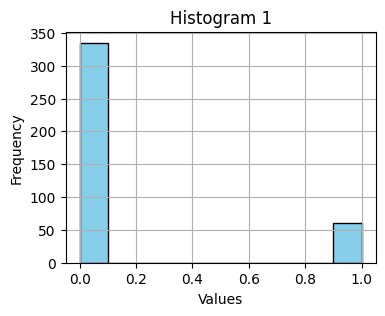

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Example list of dataframes
list_of_dfs = [y_train]  

# Plotting histograms for each dataframe in the list
for i, df in enumerate(list_of_dfs):
    plt.figure(figsize=(4, 3))
    plt.hist(df, bins=10, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title(f'Histogram {i+1}')
    plt.grid(True)
    plt.show()


#### Synthehtic data generation to overcome imbalanced target feature

SMOTE:
Synthetic Minority Over-sampling Technique for Nominal and Continuous - for datasets with numerical and categorical features.

In [14]:
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt

def oversampling(algorithm, X_train, X_test, y_train, y_test):
    # Apply oversample algorithm to the training data
    oversample = algorithm(random_state=42)
    X_train_oversampled, y_train_oversampled = oversample.fit_resample(X_train, y_train)
    X_train_oversampled_shape = X_train_oversampled.shape
    y_train_oversampled_shape = y_train_oversampled.shape

    # # Create and display a bar plot for class distribution
    # y_train_oversample.value_counts(normalize=True).plot.bar(title='Class Distribution After oversampling')
    # plt.show()

    # Dummy Classifier on dataset
    dummy_classifier = DummyClassifier()
    dummy_classifier.fit(X_train_oversampled, y_train_oversampled)
    y_pred_Dummy_oversample = dummy_classifier.predict(X_test)

    # Calculate and print the accuracy score
    score_Dummy_oversample = dummy_classifier.score(X_test, y_test)
    
    print(f"{name}_{algorithm.__name__}")
    print("X_train oversampled shape", X_train_oversampled_shape)
    print("y_train oversampled shape", y_train_oversampled_shape)
    print("DummyClassifier score: ", score_Dummy_oversample)
    print(" ")

    # return X_train_oversampled_shape, y_train_oversampled_shape, y_pred_Dummy_oversample, score_Dummy_oversample, X_train_oversampled, y_train_oversampled
    return X_train_oversampled, y_train_oversampled, X_train_oversampled.shape, y_train_oversampled.shape


In [15]:
from imblearn.over_sampling import SMOTE

# List of oversampling algorithms to test
oversampling_algorithms = [SMOTE]

# Dictionary of train/test datasets
datasets = {
    "Test Dataset": {'X_train': Imp_X_train, 'y_train': y_train, 'X_test': Imp_X_test, 'y_test': y_test},
    "Female Validation Dataset": {'X_train': Imp_X_train, 'y_train': y_train, 'X_test': Imp_X_F_val, 'y_test': y_F_val},
    "Male Validation Dataset": {'X_train': Imp_X_train, 'y_train': y_train, 'X_test': Imp_X_M_val, 'y_test': y_M_val},
}

# Create a dictionary to store the oversampled datasets
oversampled_datasets = {}

# Run oversampling for each algorithm and dataset
for algorithm in oversampling_algorithms:
    print(f"Running Oversampling for Algorithm: {algorithm.__name__}")
    for name, data in datasets.items():
        X_train_oversampled, y_train_oversampled, _, _ = oversampling(algorithm, data['X_train'], data['X_test'], data['y_train'], data['y_test'])
        dataset_name = f"{name}_{algorithm.__name__}_oversampled"
        oversampled_datasets[dataset_name] = (X_train_oversampled, y_train_oversampled)

Running Oversampling for Algorithm: SMOTE
Test Dataset_SMOTE
X_train oversampled shape (670, 10)
y_train oversampled shape (670,)
DummyClassifier score:  0.8181818181818182
 
Female Validation Dataset_SMOTE
X_train oversampled shape (670, 10)
y_train oversampled shape (670,)
DummyClassifier score:  0.8888888888888888
 
Male Validation Dataset_SMOTE
X_train oversampled shape (670, 10)
y_train oversampled shape (670,)
DummyClassifier score:  0.7857142857142857
 


## Modeling

### Training datasets

In [16]:
# Recall all oversampled datasets
X_train_list = []
y_train_list = []

for name, data in datasets.items():
    for algorithm in oversampling_algorithms:
        dataset_name = f"{name}_{algorithm.__name__}_oversampled"
        X_train, y_train = oversampled_datasets[dataset_name]
        X_train_list.append(X_train)
        y_train_list.append(y_train)


### Test datasets

In [17]:
# Test datasets lists
X_test_list = [Imp_X_test, Imp_X_F_val, Imp_X_M_val
               ]


y_test_list = [ y_test, y_F_val, y_M_val
                ]

In [18]:
import numpy as np

# Convert datasets into arrays
def array_process_datasets(dataset_list):
    X_train_list = []
    y_train_list = []
    X_test_list = []
    y_test_list = []
    
    for dataset in dataset_list:
        # Convert to NumPy arrays if they are not already
        X_train = np.array(dataset['X_train'])
        y_train = np.array(dataset['y_train'])
        X_test = np.array(dataset['X_test'])
        y_test = np.array(dataset['y_test'])
        
        X_train_list.append(X_train)
        y_train_list.append(y_train)
        X_test_list.append(X_test)
        y_test_list.append(y_test)
        
    return X_train_list, y_train_list, X_test_list, y_test_list

In [19]:
# Array datasts:
array_dataset_list = [
    {'X_train': X_train_list[0], 'y_train': y_train_list[0], 'X_test': Imp_X_test, 'y_test': y_test},
    {'X_train': X_train_list[0], 'y_train': y_train_list[0], 'X_test': Imp_X_F_val, 'y_test': y_F_val},
    {'X_train': X_train_list[0], 'y_train': y_train_list[0], 'X_test': Imp_X_M_val, 'y_test': y_M_val},
]

X_train_list, y_train_list, X_test_list, y_test_list = array_process_datasets(array_dataset_list)


In [20]:
# Datasets Name lists

modeling_data_list = [
                        "Test Dataset", 
                        "Female Validation Dataset",
                        "Male Validation Dataset",
]


### Dummy classifier

In [21]:
from sklearn.dummy import DummyClassifier

def Dummy_model(modeling_data, X_train, y_train, X_test, y_test):
    dummy = DummyClassifier(strategy= "most_frequent", random_state = 0) 
    score_Dummy = []
    for i in range(0,len(X_train)):
        dummy = dummy.fit(X_train[i], y_train[i])
        score_dummy = dummy.score(X_train[i], y_train[i])
        score_Dummy.append(score_dummy)
        y_pred_Dummy = dummy.predict(X_test[i])
    Summary = pd.DataFrame()
    Summary['dataset'] = modeling_data
    Summary['Dummy score'] = score_Dummy
    return Summary

In [22]:
Dummy_summary = Dummy_model(modeling_data_list, X_train_list, y_train_list, X_test_list, y_test_list)
Dummy_summary

,dataset,Dummy score
0,Test Dataset,0.5
1,Female Validation Dataset,0.5
2,Male Validation Dataset,0.5


### Gaussian Naive Bayes classifier

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_score

def GaussianNB_model(dataset_list, X_train, y_train, X_test, y_test):
    gnb = GaussianNB() 
    accuracy_train = []
    accuracy_test = []
    balanced_accuracy = []
    precision_0 = []
    precision_1 = []
    recall_0 = []
    recall_1 = []
    f1_score = []
    f1_micro = []
    f1_weighted = []
    roc_auc = []
    kf_scores = []
    
    plt.figure(figsize=(15, 10))
    
    for i in range(0, len(X_train)):
        # Fit model
        GNB = gnb.fit(X_train[i], y_train[i])
        y_pred = GNB.predict(X_test[i])
        y_prob = GNB.predict_proba(X_test[i])[:, 1]
        
        accuracy_test_ = metrics.accuracy_score(y_test[i], y_pred)
        accuracy_train_ = metrics.accuracy_score(y_train[i], GNB.predict(X_train[i]))
        # Performance Metrics and Evaluation
        balanced_accuracy_ = balanced_accuracy_score(y_test[i], y_pred)
        precision_0_ = metrics.precision_score(y_test[i], y_pred, pos_label=0)
        recall_0_ = metrics.recall_score(y_test[i], y_pred, pos_label=0)
        precision_1_ = metrics.precision_score(y_test[i], y_pred, pos_label=1)
        recall_1_ = metrics.recall_score(y_test[i], y_pred, pos_label=1)
        f1_score_ = metrics.f1_score(y_test[i], y_pred, average=None)
        f1_micro_ = metrics.f1_score(y_test[i], y_pred, average='micro')
        f1_weighted_ = metrics.f1_score(y_test[i], y_pred, average='weighted')
        
        # ROC curve
        fpr, tpr, _ = roc_curve(y_test[i], y_prob) 
        roc_auc_ = auc(fpr, tpr)
        
        # Plot ROC curve
        plt.plot(fpr, tpr, lw=2, label=f'Dataset {i + 1} (AUC = {roc_auc_:.2f})')
        
        # Append all
        accuracy_train.append(accuracy_train_)
        accuracy_test.append(accuracy_test_)
        balanced_accuracy.append(balanced_accuracy_)
        precision_0.append(precision_0_)
        precision_1.append(precision_1_)
        recall_0.append(recall_0_)
        recall_1.append(recall_1_)
        f1_score.append(f1_score_)
        f1_micro.append(f1_micro_)
        f1_weighted.append(f1_weighted_)
        roc_auc.append(roc_auc_)
        
        # K-Fold 
        kf = KFold(n_splits=10, shuffle=True, random_state=0)  
        kf_scores_ = cross_val_score(GNB, X_train[i], y_train[i], cv=kf)
        kf_scores.append(kf_scores_.mean())
    
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curves')
    plt.legend(loc="lower right")
    plt.show()
    
    Summary = pd.DataFrame()
    Summary['dataset'] = dataset_list
    Summary['Accuracy on test'] = accuracy_test
    Summary['Accuracy on train'] = accuracy_train
    Summary['KFold score'] = kf_scores
    Summary['Balanced Accuracy'] = balanced_accuracy
    Summary['Precision 0'] = precision_0
    Summary['Precision 1'] = precision_1
    Summary['Recall 0'] = recall_0
    Summary['Recall 1'] = recall_1
    Summary['F1 score 0, 1'] = f1_score
    Summary['F1 micro'] = f1_micro
    Summary['F1 weighted'] = f1_weighted
    Summary['ROC AUC'] = roc_auc
    return Summary, gnb


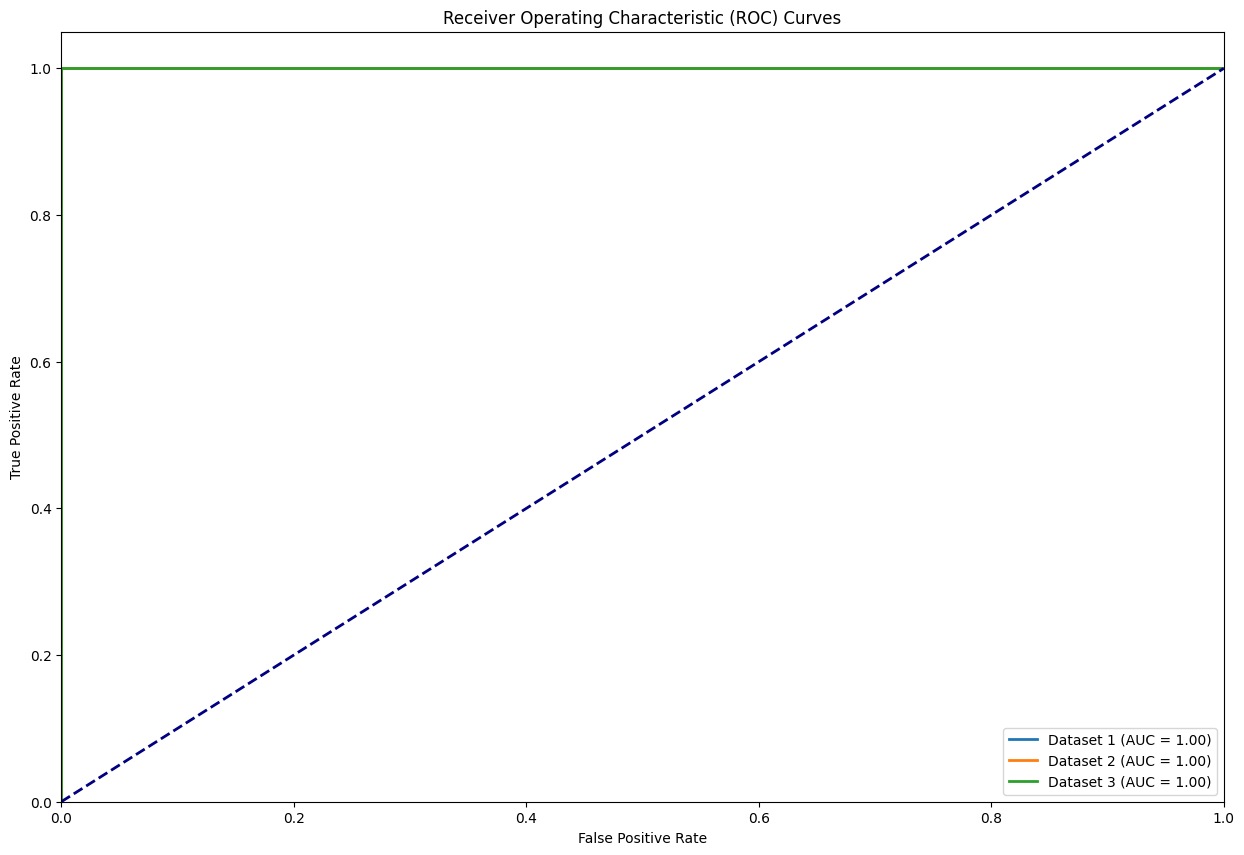

,dataset,Accuracy on test,Accuracy on train,KFold score,Balanced Accuracy,Precision 0,Precision 1,Recall 0,Recall 1,"F1 score 0, 1",F1 micro,F1 weighted,ROC AUC
0,Test Dataset,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,"[1.0, 1.0]",1.0,1.0,1.0
1,Female Validation Dataset,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,"[1.0, 1.0]",1.0,1.0,1.0
2,Male Validation Dataset,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,"[1.0, 1.0]",1.0,1.0,1.0


In [24]:
GaussianNB_summary, gnb = GaussianNB_model(modeling_data_list, X_train_list, y_train_list, X_test_list, y_test_list)
GaussianNB_summary

### KNN classifier

Max KNN scores is 0.7878787878787878 for k_neighbors: 2



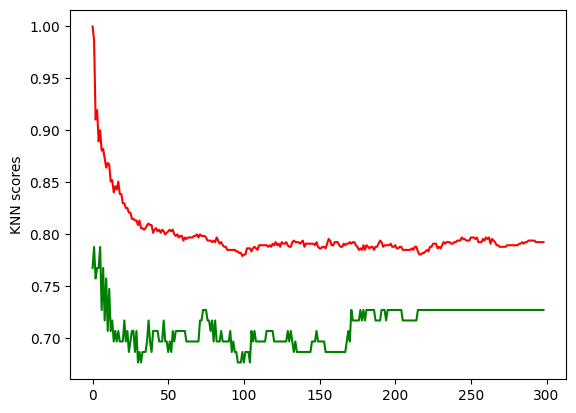

In [25]:
# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

#Train the model for various depths - FOR loop
score_KNN_ = []
score_KNN_train_ = []
for k in range(1,300):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model = knn_model.fit(X_train_list[0], y_train_list[0])
    y_pred_KNN_ = knn_model.predict(Imp_X_test)
    #Evaluate the model (Accuracy)
    score_knn = metrics.accuracy_score(y_test, y_pred_KNN_)
    score_KNN_.append(score_knn)    
    #Check accuracy on train data (NOT VALID!)
    score_knn_train = metrics.accuracy_score(y_train_list[0], knn_model.predict(X_train_list[0]))
    score_KNN_train_.append(score_knn_train)
    KNN_dict = {k+1:v for k,v in enumerate(score_KNN_)}
    opt_n_neighbors_ = max(KNN_dict, key=KNN_dict.get)
    
print(f"Max KNN scores is {max(score_KNN_)} for k_neighbors: {opt_n_neighbors_}")
print()

plt.plot(score_KNN_, color="g", label='Acc. on test')
plt.plot(score_KNN_train_, color="r", label='Acc. on train')
plt.ylabel('KNN scores');

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_curve, auc
from sklearn.model_selection import cross_val_score

def KNN_model(dataset_list, N_neighbors, X_train, y_train, X_test, y_test):
    knn = KNeighborsClassifier(n_neighbors=N_neighbors) 
    accuracy_train = []
    accuracy_test = []
    balanced_accuracy = []
    precision_0 = []
    precision_1 = []
    recall_0 = []
    recall_1 = []
    f1_score = []
    f1_micro = []
    f1_weighted = []
    roc_auc = []
    kf_scores = []
    
    plt.figure(figsize=(15, 10))
    
    for i in range(0, len(X_train)):
        # Fit model
        KNN = knn.fit(X_train[i], y_train[i])
        y_pred = KNN.predict(X_test[i])
        y_prob = KNN.predict_proba(X_test[i])[:, 1]  # Get probability scores for the positive class
        
        accuracy_test_ = metrics.accuracy_score(y_test[i], y_pred)
        accuracy_train_ = metrics.accuracy_score(y_train[i], KNN.predict(np.ascontiguousarray(X_train[i])))
        
        # Performance Metrics and Evaluation
        balanced_accuracy_ = balanced_accuracy_score(y_test[i], y_pred)
        precision_0_ = metrics.precision_score(y_test[i], y_pred, pos_label=0)
        recall_0_ = metrics.recall_score(y_test[i], y_pred, pos_label=0)
        precision_1_ = metrics.precision_score(y_test[i], y_pred, pos_label=1)
        recall_1_ = metrics.recall_score(y_test[i], y_pred, pos_label=1)
        f1_score_ = metrics.f1_score(y_test[i], y_pred, average=None)
        f1_micro_ = metrics.f1_score(y_test[i], y_pred, average='micro')
        f1_weighted_ = metrics.f1_score(y_test[i], y_pred, average='weighted')
        
        # ROC curve
        fpr, tpr, _ = roc_curve(y_test[i], y_prob) 
        roc_auc_ = auc(fpr, tpr)
        
        # Plot ROC curve
        plt.plot(fpr, tpr, lw=2, label=f'Dataset {i + 1} (AUC = {roc_auc_:.2f})')
        
        # Append all
        accuracy_train.append(accuracy_train_)
        accuracy_test.append(accuracy_test_)
        balanced_accuracy.append(balanced_accuracy_)
        precision_0.append(precision_0_)
        precision_1.append(precision_1_)
        recall_0.append(recall_0_)
        recall_1.append(recall_1_)
        f1_score.append(f1_score_)
        f1_micro.append(f1_micro_)
        f1_weighted.append(f1_weighted_)
        roc_auc.append(roc_auc_)
        
        # K-Fold 
        kf = KFold(n_splits=10, shuffle=True, random_state=0)  
        kf_scores_ = cross_val_score(KNN, X_train[i], y_train[i], cv=kf)
        kf_scores.append(kf_scores_.mean())
    
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curves')
    plt.legend(loc="lower right")
    plt.show()
    
    Summary = pd.DataFrame()
    Summary['dataset'] = dataset_list
    Summary['Accuracy on test'] = accuracy_test
    Summary['Accuracy on train'] = accuracy_train
    Summary['KFold score'] = kf_scores
    Summary['Balanced Accuracy'] = balanced_accuracy
    Summary['Precision 0'] = precision_0
    Summary['Precision 1'] = precision_1
    Summary['Recall 0'] = recall_0
    Summary['Recall 1'] = recall_1
    Summary['F1 score 0, 1'] = f1_score
    Summary['F1 micro'] = f1_micro
    Summary['F1 weighted'] = f1_weighted
    Summary['ROC AUC'] = roc_auc
    
    return Summary, knn


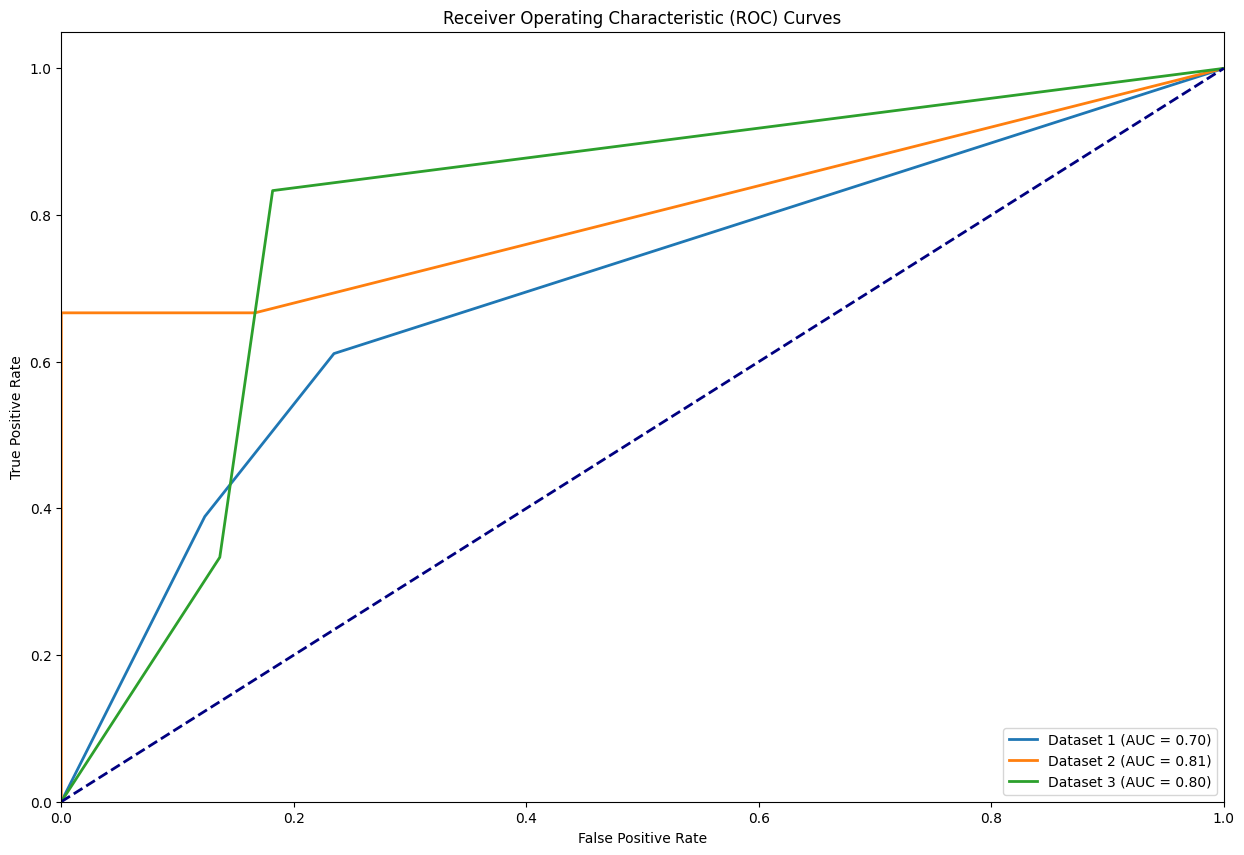

,dataset,Accuracy on test,Accuracy on train,KFold score,Balanced Accuracy,Precision 0,Precision 1,Recall 0,Recall 1,"F1 score 0, 1",F1 micro,F1 weighted,ROC AUC
0,Test Dataset,0.787879,0.986567,0.876119,0.632716,0.865854,0.411765,0.876543,0.388889,"[0.8711656441717791, 0.39999999999999997]",0.787879,0.785499,0.696159
1,Female Validation Dataset,0.962963,0.986567,0.876119,0.833333,0.960000,1.000000,1.000000,0.666667,"[0.9795918367346939, 0.8]",0.962963,0.959637,0.805556
2,Male Validation Dataset,0.750000,0.986567,0.876119,0.598485,0.826087,0.400000,0.863636,0.333333,"[0.8444444444444444, 0.3636363636363636]",0.750000,0.741414,0.799242


In [27]:
N = opt_n_neighbors_

KNN_summarry, knn = KNN_model(modeling_data_list, N, X_train_list, y_train_list, X_test_list, y_test_list)
KNN_summarry

### SVC Classifier 

Max SVC scores is 0.9090909090909091 for C = 0.01, kernel = sigmoid and gamma = 0.001



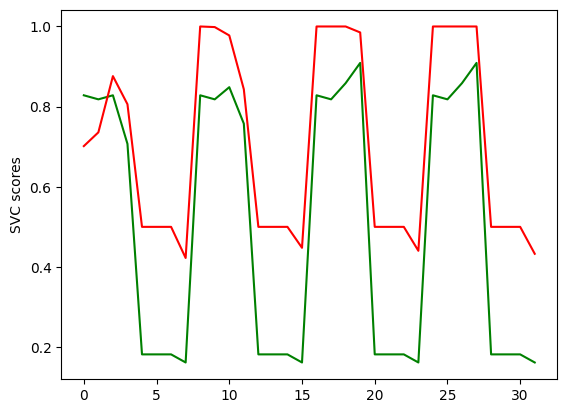

In [28]:
# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")


import itertools

from sklearn.svm import SVC

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

#Train the model for various depths - FOR loop
parameters = []
c_krn_g = [(0.001, 0.01, 0.1, 1, 10, 100), ('rbf', 'sigmoid'), (10, 1, 0.1, 0.01, 0.001)]
for i in itertools.product(*c_krn_g):
         parameters.append(i)


score_SVC_le = []
score_SVC_train_le = []
for c in [0.1, 1, 10, 100]:
    for krn in ['rbf', 'sigmoid']:
        for g in [1, 0.1, 0.01, 0.001]:
            svc_model_le = SVC(C=c, kernel =krn, gamma=g, random_state=0)
            svc_model_le = svc_model_le.fit(X_train_list[0], y_train_list[0])
            y_pred_svc_le = svc_model_le.predict(Imp_X_test)
            #Evaluate the model (Accuracy)
            score_svc = accuracy_score(y_test, y_pred_svc_le)
            score_SVC_le.append(score_svc)
            #Check accuracy on train data 
            score_svc_train = accuracy_score(y_train_list[0], svc_model_le.predict(X_train_list[0]))
            score_SVC_train_le.append(score_svc_train)
            SVC_dict = {c+1:v for c,v in enumerate(score_SVC_le)}
            opt_parameters = max(SVC_dict, key=SVC_dict.get)
            opt_C = parameters[opt_parameters-1][0]
            opt_kernel = parameters[opt_parameters-1][1]
            opt_gamma = parameters[opt_parameters-1][2]

print(f"Max SVC scores is {max(score_SVC_le)} for C = {opt_C}, kernel = {opt_kernel} and gamma = {opt_gamma}")
print()

plt.plot(score_SVC_le, color="g", label='Acc. on test')
plt.plot(score_SVC_train_le, color="r", label='Acc. on train')
plt.ylabel('SVC scores');

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_curve, auc
from sklearn.model_selection import cross_val_score

def SVC_model(dataset_list, c, Kernel, Gamma, X_train, y_train, X_test, y_test):
    svc = SVC(C=c, kernel=Kernel, gamma=Gamma, probability=True, random_state=0) 
    accuracy_train = []
    accuracy_test = []
    balanced_accuracy = []
    precision_0 = []
    precision_1 = []
    recall_0 = []
    recall_1 = []
    f1_score = []
    f1_micro = []
    f1_weighted = []
    roc_auc = []
    kf_scores = []
    
    plt.figure(figsize=(15, 10))
    
    for i in range(len(X_train)):
        # Fit model
        SVC_model = svc.fit(X_train[i], y_train[i])
        y_pred = SVC_model.predict(X_test[i])
        y_prob = SVC_model.predict_proba(X_test[i])[:, 1]  # Get probability scores for the positive class
        
        accuracy_test_ = accuracy_score(y_test[i], y_pred)
        accuracy_train_ = accuracy_score(y_train[i], SVC_model.predict(X_train[i]))
        
        # Performance Metrics and Evaluation
        balanced_accuracy_ = balanced_accuracy_score(y_test[i], y_pred)
        precision_0_ = metrics.precision_score(y_test[i], y_pred, pos_label=0)
        recall_0_ = metrics.recall_score(y_test[i], y_pred, pos_label=0)
        precision_1_ = metrics.precision_score(y_test[i], y_pred, pos_label=1)
        recall_1_ = metrics.recall_score(y_test[i], y_pred, pos_label=1)
        f1_score_ = metrics.f1_score(y_test[i], y_pred, average=None)
        f1_micro_ = metrics.f1_score(y_test[i], y_pred, average='micro')
        f1_weighted_ = metrics.f1_score(y_test[i], y_pred, average='weighted')
        
        # ROC curve
        fpr, tpr, _ = roc_curve(y_test[i], y_prob)
        roc_auc_ = auc(fpr, tpr)
        
        # Plot ROC curve
        plt.plot(fpr, tpr, lw=2, label=f'Dataset {i + 1} (AUC = {roc_auc_:.2f})')
        
        # Append all
        accuracy_train.append(accuracy_train_)
        accuracy_test.append(accuracy_test_)
        balanced_accuracy.append(balanced_accuracy_)
        precision_0.append(precision_0_)
        precision_1.append(precision_1_)
        recall_0.append(recall_0_)
        recall_1.append(recall_1_)
        f1_score.append(f1_score_)
        f1_micro.append(f1_micro_)
        f1_weighted.append(f1_weighted_)
        roc_auc.append(roc_auc_)
        
        # K-Fold 
        kf = KFold(n_splits=10, shuffle=True, random_state=0)  
        kf_scores_ = cross_val_score(SVC_model, X_train[i], y_train[i], cv=kf)
        kf_scores.append(kf_scores_.mean())
    
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curves')
    plt.legend(loc="lower right")
    plt.show()
    
    Summary = pd.DataFrame()
    Summary['dataset'] = dataset_list
    Summary['Accuracy on test'] = accuracy_test
    Summary['Accuracy on train'] = accuracy_train
    Summary['KFold score'] = kf_scores
    Summary['Balanced Accuracy'] = balanced_accuracy
    Summary['Precision 0'] = precision_0
    Summary['Precision 1'] = precision_1
    Summary['Recall 0'] = recall_0
    Summary['Recall 1'] = recall_1
    Summary['F1 score 0, 1'] = f1_score
    Summary['F1 micro'] = f1_micro
    Summary['F1 weighted'] = f1_weighted
    Summary['ROC AUC'] = roc_auc
    
    return Summary, svc


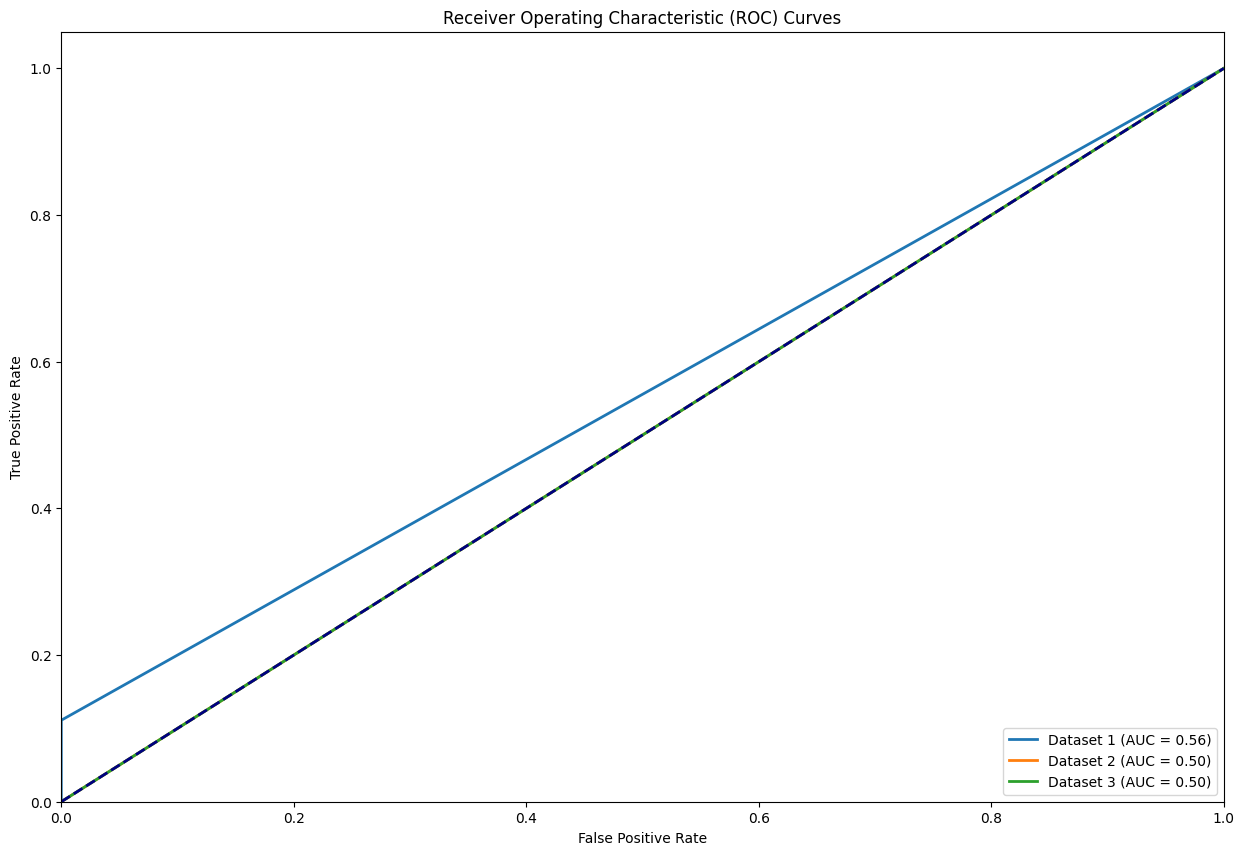

,dataset,Accuracy on test,Accuracy on train,KFold score,Balanced Accuracy,Precision 0,Precision 1,Recall 0,Recall 1,"F1 score 0, 1",F1 micro,F1 weighted,ROC AUC
0,Test Dataset,0.161616,0.449254,0.462687,0.444444,0.0,0.164948,0.0,0.888889,"[0.0, 0.27826086956521734]",0.161616,0.050593,0.555556
1,Female Validation Dataset,0.111111,0.449254,0.462687,0.500000,0.0,0.111111,0.0,1.000000,"[0.0, 0.19999999999999998]",0.111111,0.022222,0.500000
2,Male Validation Dataset,0.214286,0.449254,0.462687,0.500000,0.0,0.214286,0.0,1.000000,"[0.0, 0.35294117647058826]",0.214286,0.075630,0.500000


In [30]:
Dataset_list, C, Kernel, Gamma = modeling_data_list, opt_C, opt_kernel, opt_gamma

SVC_summarry, svc = SVC_model(Dataset_list, C, Kernel, Gamma, X_train_list, y_train_list, X_test_list, y_test_list)
SVC_summarry

### Bagging Classifier

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_curve, auc
from sklearn.model_selection import cross_val_score
import warnings

warnings.filterwarnings("ignore")

def BaggingClassifier_model(estimator, modeling_data, X_train, y_train, X_test, y_test):
    bag = BaggingClassifier(base_estimator=estimator, n_estimators=10, random_state=0)
    accuracy_train = []
    accuracy_test = []
    balanced_accuracy = []
    precision_0 = []
    precision_1 = []
    recall_0 = []
    recall_1 = []
    f1_score = []
    f1_micro = []
    f1_weighted = []
    roc_auc = []
    kf_scores = []
    
    plt.figure(figsize=(15, 10))
    
    for i in range(len(X_train)):
        # Fit model
        BAG = bag.fit(X_train[i], y_train[i])
        y_pred = BAG.predict(X_test[i])
        y_prob = BAG.predict_proba(X_test[i])[:, 1]  # Get probability scores for the positive class
        
        accuracy_test_ = accuracy_score(y_test[i], y_pred)
        accuracy_train_ = accuracy_score(y_train[i], BAG.predict(X_train[i]))
        
        # Performance Metrics and Evaluation
        balanced_accuracy_ = balanced_accuracy_score(y_test[i], y_pred)
        precision_0_ = metrics.precision_score(y_test[i], y_pred, pos_label=0)
        recall_0_ = metrics.recall_score(y_test[i], y_pred, pos_label=0)
        precision_1_ = metrics.precision_score(y_test[i], y_pred, pos_label=1)
        recall_1_ = metrics.recall_score(y_test[i], y_pred, pos_label=1)
        f1_score_ = metrics.f1_score(y_test[i], y_pred, average=None)
        f1_micro_ = metrics.f1_score(y_test[i], y_pred, average='micro')
        f1_weighted_ = metrics.f1_score(y_test[i], y_pred, average='weighted')
        
        # ROC curve
        fpr, tpr, _ = roc_curve(y_test[i], y_prob)
        roc_auc_ = auc(fpr, tpr)
        
        # Plot ROC curve
        plt.plot(fpr, tpr, lw=2, label=f'Dataset {i + 1} (AUC = {roc_auc_:.2f})')
        
        # Append all
        accuracy_train.append(accuracy_train_)
        accuracy_test.append(accuracy_test_)
        balanced_accuracy.append(balanced_accuracy_)
        precision_0.append(precision_0_)
        precision_1.append(precision_1_)
        recall_0.append(recall_0_)
        recall_1.append(recall_1_)
        f1_score.append(f1_score_)
        f1_micro.append(f1_micro_)
        f1_weighted.append(f1_weighted_)
        roc_auc.append(roc_auc_)
        
        # K-Fold 
        kf = KFold(n_splits=10, shuffle=True, random_state=0)  
        kf_scores_ = cross_val_score(BAG, X_train[i], y_train[i], cv=kf)
        kf_scores.append(kf_scores_.mean())
    
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curves')
    plt.legend(loc="lower right")
    plt.show()
    
    Summary = pd.DataFrame()
    Summary['dataset'] = modeling_data
    Summary['Accuracy on test'] = accuracy_test
    Summary['Accuracy on train'] = accuracy_train
    Summary['KFold score'] = kf_scores
    Summary['Balanced Accuracy'] = balanced_accuracy
    Summary['Precision 0'] = precision_0
    Summary['Precision 1'] = precision_1
    Summary['Recall 0'] = recall_0
    Summary['Recall 1'] = recall_1
    Summary['F1 score 0, 1'] = f1_score
    Summary['F1 micro'] = f1_micro
    Summary['F1 weighted'] = f1_weighted
    Summary['ROC AUC'] = roc_auc
    
    return Summary, bag


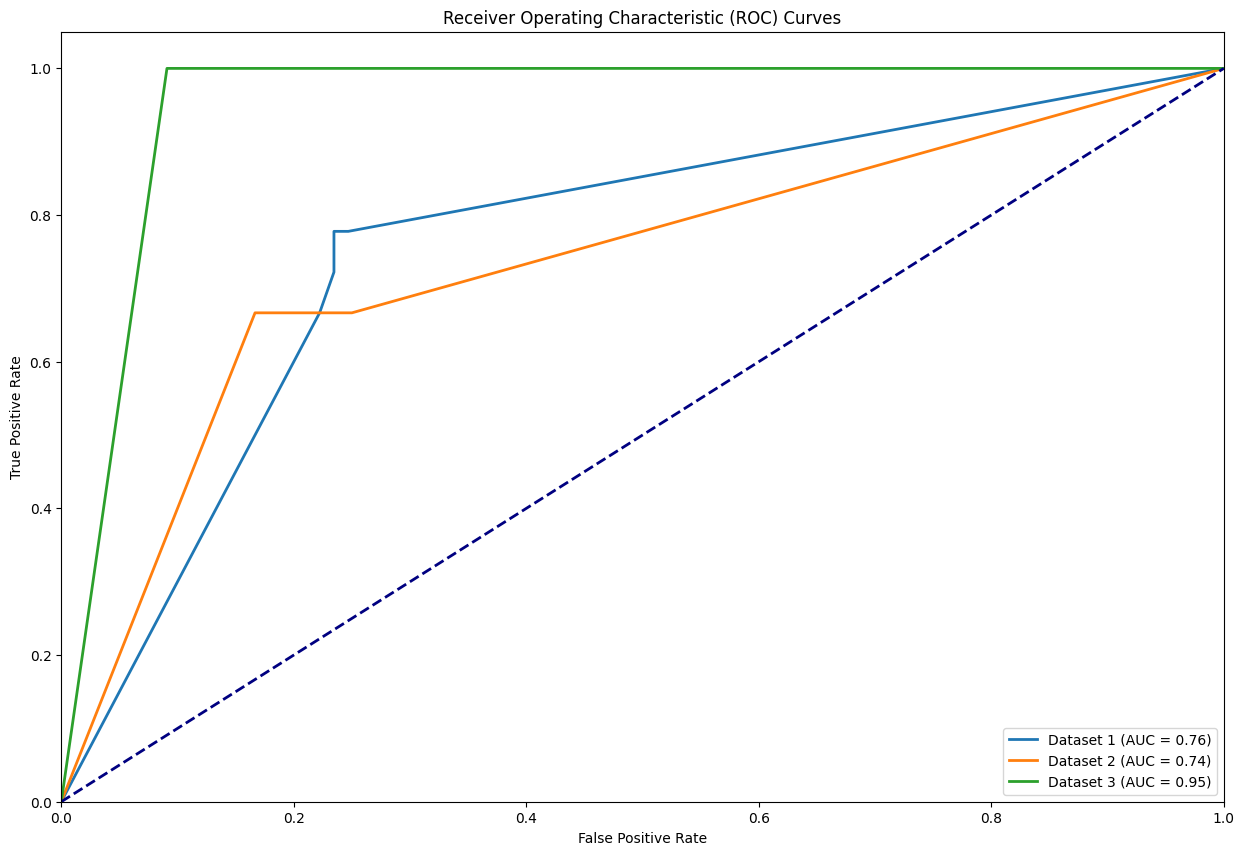

,dataset,Accuracy on test,Accuracy on train,KFold score,Balanced Accuracy,Precision 0,Precision 1,Recall 0,Recall 1,"F1 score 0, 1",F1 micro,F1 weighted,ROC AUC
0,Test Dataset,0.767677,0.807463,0.797015,0.771605,0.939394,0.424242,0.765432,0.777778,"[0.8435374149659863, 0.5490196078431373]",0.767677,0.789989,0.761660
1,Female Validation Dataset,0.814815,0.807463,0.797015,0.750000,0.952381,0.333333,0.833333,0.666667,"[0.888888888888889, 0.4444444444444444]",0.814815,0.839506,0.736111
2,Male Validation Dataset,0.785714,0.807463,0.797015,0.863636,1.000000,0.500000,0.727273,1.000000,"[0.8421052631578948, 0.6666666666666666]",0.785714,0.804511,0.954545


In [32]:
from sklearn.svm import SVC

Estimator = SVC(random_state=0)

Bagging_summarry, bag = BaggingClassifier_model(Estimator, modeling_data_list, X_train_list, y_train_list, X_test_list, y_test_list)
Bagging_summarry

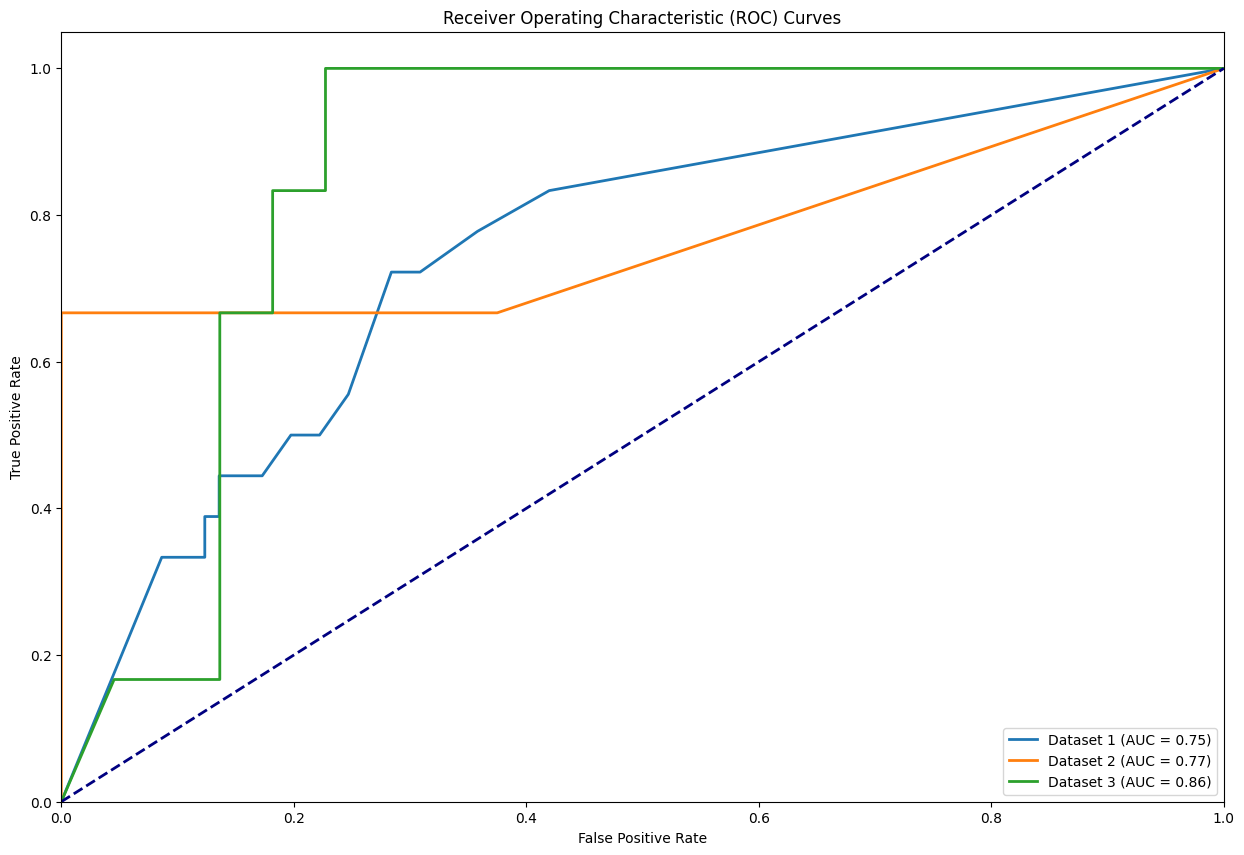

,dataset,Accuracy on test,Accuracy on train,KFold score,Balanced Accuracy,Precision 0,Precision 1,Recall 0,Recall 1,"F1 score 0, 1",F1 micro,F1 weighted,ROC AUC
0,Test Dataset,0.757576,0.961194,0.879104,0.635802,0.870130,0.363636,0.827160,0.444444,"[0.8481012658227849, 0.39999999999999997]",0.757576,0.766628,0.745199
1,Female Validation Dataset,0.888889,0.961194,0.879104,0.791667,0.956522,0.500000,0.916667,0.666667,"[0.9361702127659574, 0.5714285714285715]",0.888889,0.895643,0.770833
2,Male Validation Dataset,0.821429,0.961194,0.879104,0.765152,0.904762,0.571429,0.863636,0.666667,"[0.8837209302325582, 0.6153846153846153]",0.821429,0.826220,0.859848


In [33]:
from sklearn.neighbors import KNeighborsClassifier

Estimator = KNeighborsClassifier(n_neighbors=opt_n_neighbors_)

Bagging_summarry_KNN, bag_knn = BaggingClassifier_model(Estimator, modeling_data_list, X_train_list, y_train_list, X_test_list, y_test_list)
Bagging_summarry_KNN

### Voting Classifier 

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_curve, auc
from sklearn.model_selection import cross_val_score

def VotingClassifier_model(C1, C2, Vote, modeling_data, X_train, y_train, X_test, y_test):
    voting = VotingClassifier(estimators=[(f'{C1}', C1), (f'{C2}', C2)], voting=Vote)
    accuracy_train = []
    accuracy_test = []
    balanced_accuracy = []
    precision_0 = []
    precision_1 = []
    recall_0 = []
    recall_1 = []
    f1_score = []
    f1_micro = []
    f1_weighted = []
    roc_auc = []
    kf_scores = []
    
    plt.figure(figsize=(15, 10))
    
    for i in range(len(X_train)):
        # Fit model
        Voting = voting.fit(X_train[i], y_train[i])
        y_pred = Voting.predict(X_test[i])
        
        # Check if voting is 'soft' to get probabilities
        if Vote == 'soft':
            y_prob = Voting.predict_proba(X_test[i])[:, 1]
        else:
            # For 'hard' voting, we cannot get probabilities, hence using predictions for ROC curve
            y_prob = y_pred
        
        accuracy_test_ = accuracy_score(y_test[i], y_pred)
        accuracy_train_ = accuracy_score(y_train[i], Voting.predict(X_train[i]))
        
        # Performance Metrics and Evaluation
        balanced_accuracy_ = balanced_accuracy_score(y_test[i], y_pred)
        precision_0_ = metrics.precision_score(y_test[i], y_pred, pos_label=0)
        recall_0_ = metrics.recall_score(y_test[i], y_pred, pos_label=0)
        precision_1_ = metrics.precision_score(y_test[i], y_pred, pos_label=1)
        recall_1_ = metrics.recall_score(y_test[i], y_pred, pos_label=1)
        f1_score_ = metrics.f1_score(y_test[i], y_pred, average=None)
        f1_micro_ = metrics.f1_score(y_test[i], y_pred, average='micro')
        f1_weighted_ = metrics.f1_score(y_test[i], y_pred, average='weighted')
        
        # ROC curve
        fpr, tpr, _ = roc_curve(y_test[i], y_prob)
        roc_auc_ = auc(fpr, tpr)
        
        # Plot ROC curve
        plt.plot(fpr, tpr, lw=2, label=f'Dataset {i + 1} (AUC = {roc_auc_:.2f})')
        
        # Append all
        accuracy_train.append(accuracy_train_)
        accuracy_test.append(accuracy_test_)
        balanced_accuracy.append(balanced_accuracy_)
        precision_0.append(precision_0_)
        precision_1.append(precision_1_)
        recall_0.append(recall_0_)
        recall_1.append(recall_1_)
        f1_score.append(f1_score_)
        f1_micro.append(f1_micro_)
        f1_weighted.append(f1_weighted_)
        roc_auc.append(roc_auc_)
        
        # K-Fold 
        kf = KFold(n_splits=10, shuffle=True, random_state=0)  
        kf_scores_ = cross_val_score(Voting, X_train[i], y_train[i], cv=kf)
        kf_scores.append(kf_scores_.mean())
    
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curves')
    plt.legend(loc="lower right")
    plt.show()
    
    Summary = pd.DataFrame()
    Summary['dataset'] = modeling_data
    Summary['Accuracy on test'] = accuracy_test
    Summary['Accuracy on train'] = accuracy_train
    Summary['KFold score'] = kf_scores
    Summary['Balanced Accuracy'] = balanced_accuracy
    Summary['Precision 0'] = precision_0
    Summary['Precision 1'] = precision_1
    Summary['Recall 0'] = recall_0
    Summary['Recall 1'] = recall_1
    Summary['F1 score 0, 1'] = f1_score
    Summary['F1 micro'] = f1_micro
    Summary['F1 weighted'] = f1_weighted
    Summary['ROC AUC'] = roc_auc
    
    return Summary, voting


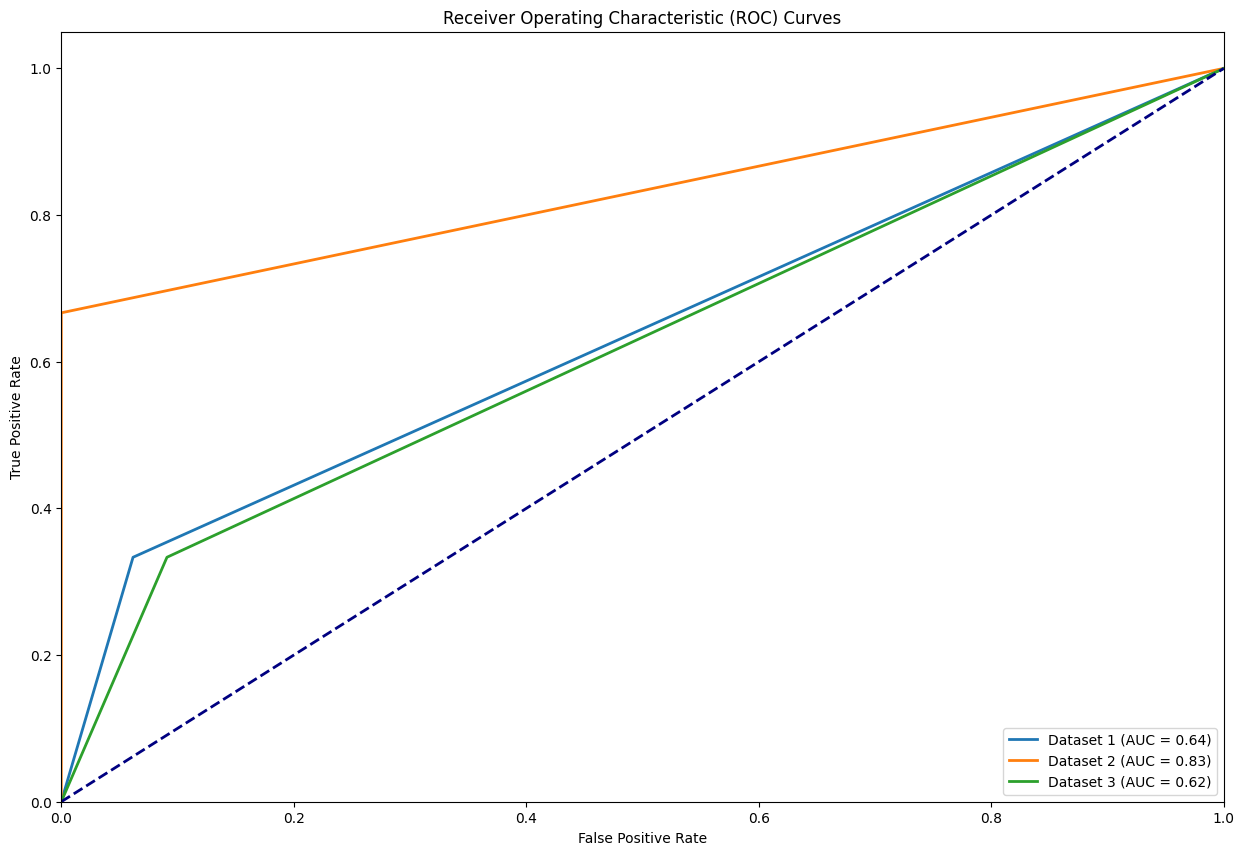

,dataset,Accuracy on test,Accuracy on train,KFold score,Balanced Accuracy,Precision 0,Precision 1,Recall 0,Recall 1,"F1 score 0, 1",F1 micro,F1 weighted,ROC AUC
0,Test Dataset,0.828283,0.898507,0.828358,0.635802,0.863636,0.545455,0.938272,0.333333,"[0.8994082840236687, 0.41379310344827586]",0.828283,0.811115,0.635802
1,Female Validation Dataset,0.962963,0.898507,0.828358,0.833333,0.960000,1.000000,1.000000,0.666667,"[0.9795918367346939, 0.8]",0.962963,0.959637,0.833333
2,Male Validation Dataset,0.785714,0.898507,0.828358,0.621212,0.833333,0.500000,0.909091,0.333333,"[0.8695652173913043, 0.4]",0.785714,0.768944,0.621212


In [35]:
clf1 = KNeighborsClassifier(n_neighbors=opt_n_neighbors_)
clf2 = BaggingClassifier(base_estimator=SVC(random_state=0), random_state=0)
vote = ['hard']

Voting_summarry, voting = VotingClassifier_model(clf1, clf2, vote[0], modeling_data_list, X_train_list, y_train_list, X_test_list, y_test_list)
Voting_summarry

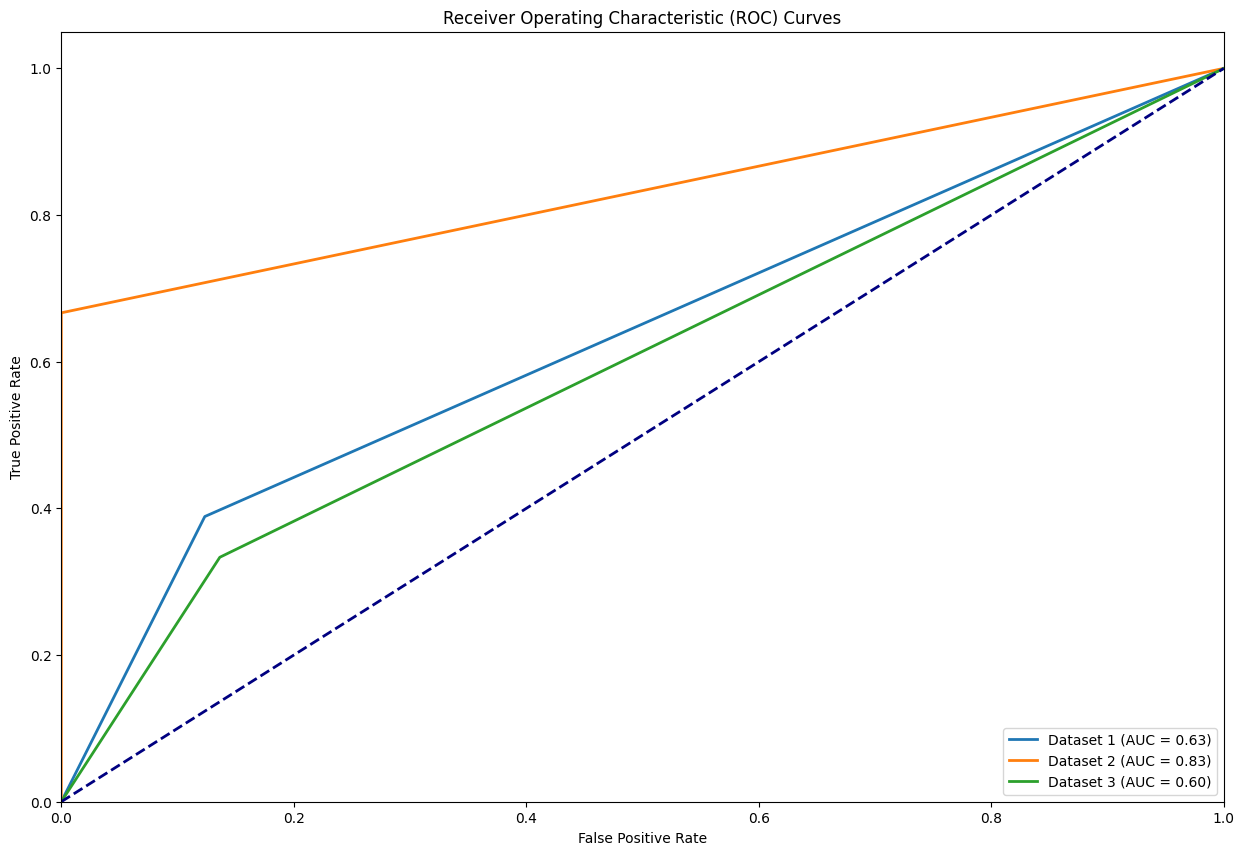

,dataset,Accuracy on test,Accuracy on train,KFold score,Balanced Accuracy,Precision 0,Precision 1,Recall 0,Recall 1,"F1 score 0, 1",F1 micro,F1 weighted,ROC AUC
0,Test Dataset,0.787879,0.986567,0.876119,0.632716,0.865854,0.411765,0.876543,0.388889,"[0.8711656441717791, 0.39999999999999997]",0.787879,0.785499,0.632716
1,Female Validation Dataset,0.962963,0.986567,0.876119,0.833333,0.960000,1.000000,1.000000,0.666667,"[0.9795918367346939, 0.8]",0.962963,0.959637,0.833333
2,Male Validation Dataset,0.750000,0.986567,0.876119,0.598485,0.826087,0.400000,0.863636,0.333333,"[0.8444444444444444, 0.3636363636363636]",0.750000,0.741414,0.598485


In [36]:
clf1 = KNeighborsClassifier(n_neighbors=opt_n_neighbors_) 
clf2_ = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=opt_n_neighbors_), random_state=0)
vote = ['hard']

Voting_summarry_, voting_ = VotingClassifier_model(clf1, clf2_, vote[0], modeling_data_list, X_train_list, y_train_list, X_test_list, y_test_list)
Voting_summarry_

### Stacking Classifier

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_curve, auc
from sklearn.model_selection import cross_val_score

def StackingClassifier_model(C1, C2, modeling_data, X_train, y_train, X_test, y_test):
    stacking = StackingClassifier(estimators=[(f'{C1}', C1), (f'{C2}', C2)], final_estimator=C1)
    accuracy_train = []
    accuracy_test = []
    balanced_accuracy = []
    precision_0 = []
    precision_1 = []
    recall_0 = []
    recall_1 = []
    f1_score = []
    f1_micro = []
    f1_weighted = []
    roc_auc = []
    kf_scores = []
    
    plt.figure(figsize=(15, 10))
    
    for i in range(len(X_train)):
        # Fit model
        Stacking = stacking.fit(X_train[i], y_train[i])
        y_pred = Stacking.predict(X_test[i])
        
        # Check if final_estimator supports probability prediction
        if hasattr(Stacking, "predict_proba"):
            y_prob = Stacking.predict_proba(X_test[i])[:, 1]
        else:
            # If probability prediction is not available, use the decision function
            y_prob = Stacking.decision_function(X_test[i])
        
        accuracy_test_ = accuracy_score(y_test[i], y_pred)
        accuracy_train_ = accuracy_score(y_train[i], Stacking.predict(X_train[i]))
        
        # Performance Metrics and Evaluation
        balanced_accuracy_ = balanced_accuracy_score(y_test[i], y_pred)
        precision_0_ = metrics.precision_score(y_test[i], y_pred, pos_label=0)
        recall_0_ = metrics.recall_score(y_test[i], y_pred, pos_label=0)
        precision_1_ = metrics.precision_score(y_test[i], y_pred, pos_label=1)
        recall_1_ = metrics.recall_score(y_test[i], y_pred, pos_label=1)
        f1_score_ = metrics.f1_score(y_test[i], y_pred, average=None)
        f1_micro_ = metrics.f1_score(y_test[i], y_pred, average='micro')
        f1_weighted_ = metrics.f1_score(y_test[i], y_pred, average='weighted')
        
        # ROC curve
        fpr, tpr, _ = roc_curve(y_test[i], y_prob)
        roc_auc_ = auc(fpr, tpr)
        
        # Plot ROC curve
        plt.plot(fpr, tpr, lw=2, label=f'Dataset {i + 1} (AUC = {roc_auc_:.2f})')
        
        # Append all
        accuracy_train.append(accuracy_train_)
        accuracy_test.append(accuracy_test_)
        balanced_accuracy.append(balanced_accuracy_)
        precision_0.append(precision_0_)
        precision_1.append(precision_1_)
        recall_0.append(recall_0_)
        recall_1.append(recall_1_)
        f1_score.append(f1_score_)
        f1_micro.append(f1_micro_)
        f1_weighted.append(f1_weighted_)
        roc_auc.append(roc_auc_)
        
        # K-Fold 
        kf = KFold(n_splits=10, shuffle=True, random_state=0)  
        kf_scores_ = cross_val_score(Stacking, X_train[i], y_train[i], cv=kf)
        kf_scores.append(kf_scores_.mean())
    
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curves')
    plt.legend(loc="lower right")
    plt.show()
    
    Summary = pd.DataFrame()
    Summary['dataset'] = modeling_data
    Summary['Accuracy on test'] = accuracy_test
    Summary['Accuracy on train'] = accuracy_train
    Summary['KFold score'] = kf_scores
    Summary['Balanced Accuracy'] = balanced_accuracy
    Summary['Precision 0'] = precision_0
    Summary['Precision 1'] = precision_1
    Summary['Recall 0'] = recall_0
    Summary['Recall 1'] = recall_1
    Summary['F1 score 0, 1'] = f1_score
    Summary['F1 micro'] = f1_micro
    Summary['F1 weighted'] = f1_weighted
    Summary['ROC AUC'] = roc_auc
    
    return Summary, stacking


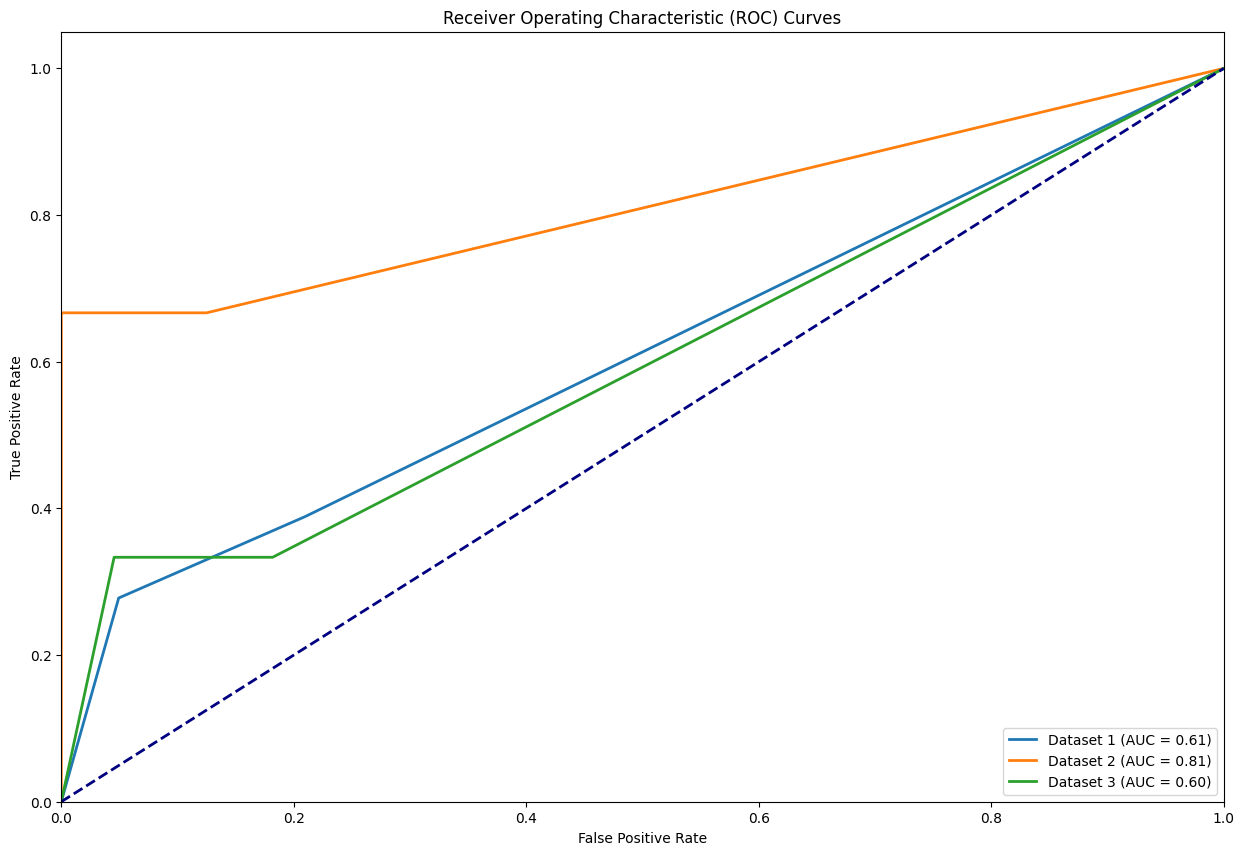

,dataset,Accuracy on test,Accuracy on train,KFold score,Balanced Accuracy,Precision 0,Precision 1,Recall 0,Recall 1,"F1 score 0, 1",F1 micro,F1 weighted,ROC AUC
0,Test Dataset,0.828283,0.871642,0.674627,0.614198,0.855556,0.555556,0.950617,0.277778,"[0.9005847953216374, 0.3703703703703704]",0.828283,0.804182,0.609053
1,Female Validation Dataset,0.962963,0.871642,0.674627,0.833333,0.960000,1.000000,1.000000,0.666667,"[0.9795918367346939, 0.8]",0.962963,0.959637,0.812500
2,Male Validation Dataset,0.821429,0.871642,0.674627,0.643939,0.840000,0.666667,0.954545,0.333333,"[0.8936170212765958, 0.4444444444444444]",0.821429,0.797366,0.598485


In [38]:
cl1 = KNeighborsClassifier(n_neighbors=opt_n_neighbors_)
cl2 = BaggingClassifier(base_estimator=SVC(random_state=0), random_state=0)

Stacking_summarry, stacking = StackingClassifier_model(cl1, cl2, modeling_data_list, X_train_list, y_train_list, X_test_list, y_test_list)
Stacking_summarry

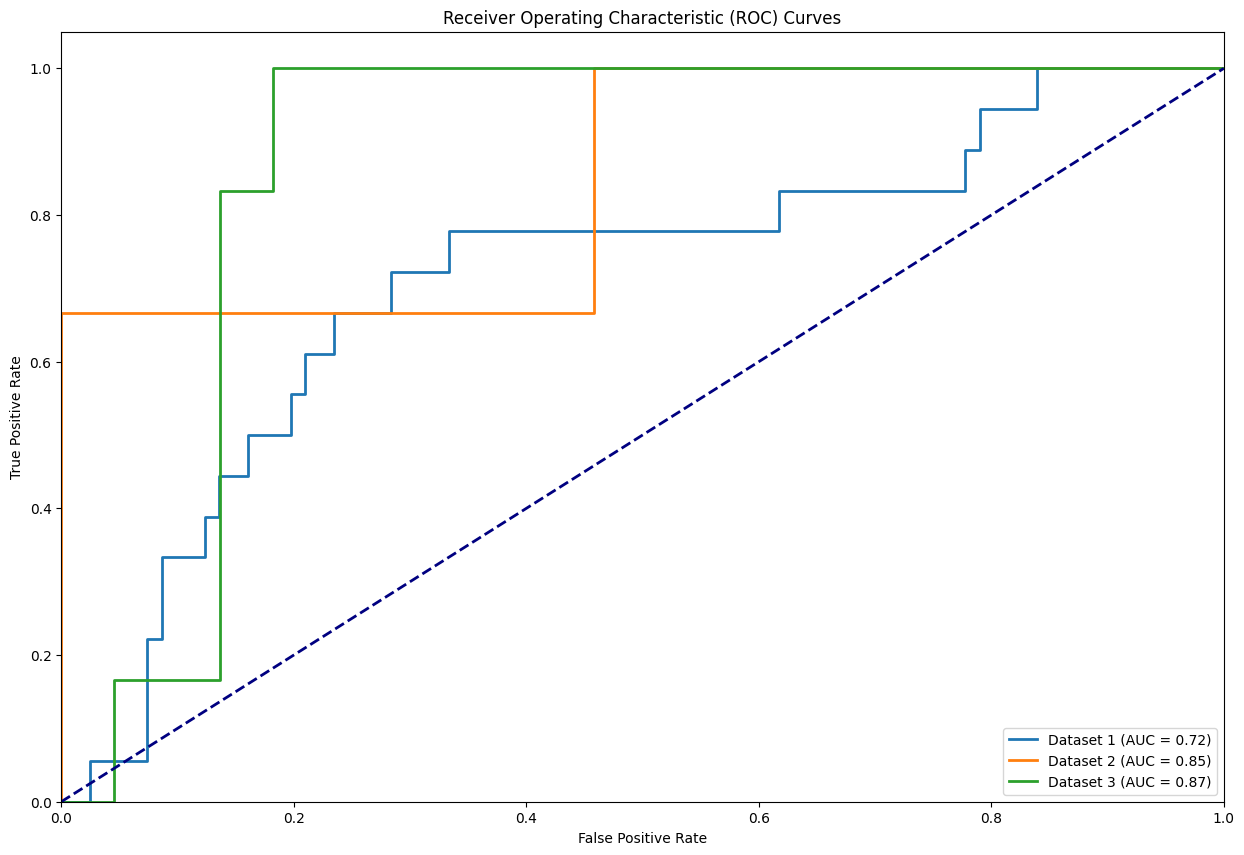

,dataset,Accuracy on test,Accuracy on train,KFold score,Balanced Accuracy,Precision 0,Precision 1,Recall 0,Recall 1,"F1 score 0, 1",F1 micro,F1 weighted,ROC AUC
0,Test Dataset,0.777778,0.959701,0.874627,0.669753,0.883117,0.409091,0.839506,0.500000,"[0.860759493670886, 0.45]",0.777778,0.786076,0.715364
1,Female Validation Dataset,0.888889,0.959701,0.874627,0.791667,0.956522,0.500000,0.916667,0.666667,"[0.9361702127659574, 0.5714285714285715]",0.888889,0.895643,0.847222
2,Male Validation Dataset,0.821429,0.959701,0.874627,0.765152,0.904762,0.571429,0.863636,0.666667,"[0.8837209302325582, 0.6153846153846153]",0.821429,0.826220,0.871212


In [39]:
cl1_ = SVC(random_state=0)
cl2_ = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=opt_n_neighbors_), random_state=0)

Stacking_summarry_, stacking_ = StackingClassifier_model(cl1_, cl2_, modeling_data_list, X_train_list, y_train_list, X_test_list, y_test_list)
Stacking_summarry_

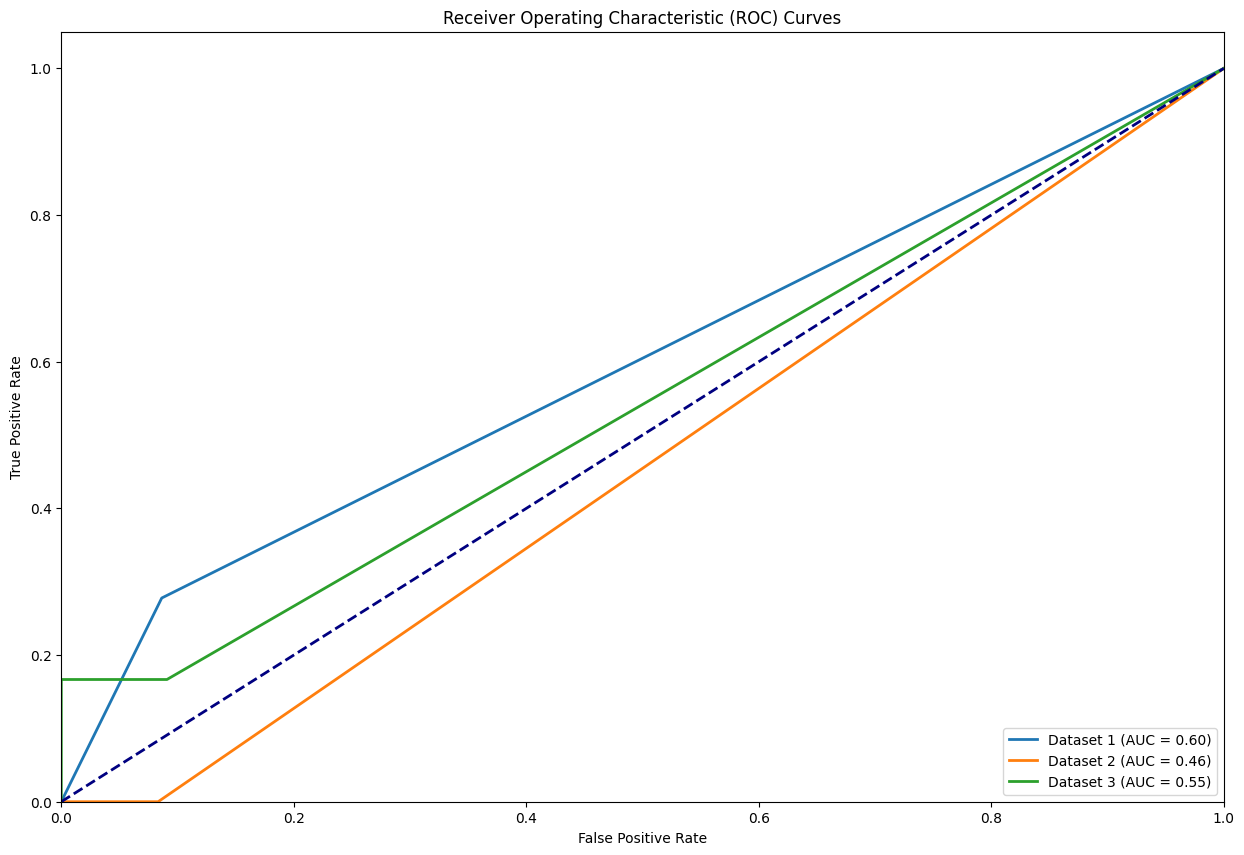

,dataset,Accuracy on test,Accuracy on train,KFold score,Balanced Accuracy,Precision 0,Precision 1,Recall 0,Recall 1,"F1 score 0, 1",F1 micro,F1 weighted,ROC AUC
0,Test Dataset,0.818182,0.504478,0.535821,0.500000,0.818182,0.0,1.000000,0.000000,"[0.9, 0.0]",0.818182,0.736364,0.595679
1,Female Validation Dataset,0.851852,0.504478,0.535821,0.479167,0.884615,0.0,0.958333,0.000000,"[0.9199999999999999, 0.0]",0.851852,0.817778,0.458333
2,Male Validation Dataset,0.821429,0.504478,0.535821,0.583333,0.814815,1.0,1.000000,0.166667,"[0.8979591836734693, 0.2857142857142857]",0.821429,0.766764,0.545455


In [40]:
cl1 = KNeighborsClassifier(n_neighbors=opt_n_neighbors_)
cl2_ = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=opt_n_neighbors_), random_state=0)

Stacking_summarry__, stacking__ = StackingClassifier_model(cl1, cl2_, modeling_data_list, X_train_list, y_train_list, X_test_list, y_test_list)
Stacking_summarry__

### Results Summary


Descriptioin of the evaluation metrics and their concepts, particularly focusing on their relevance when working with imbalanced datasets in predicting ASD in people.

1. **KFold Score**: This refers to the performance score obtained through k-fold cross-validation, where the dataset is divided into k subsets, and the model is trained and evaluated k times, using each subset as a testing set exactly once. KFold score provides an average performance across all folds, reducing the variance of the evaluation.

2. **Balanced Accuracy**: Balanced accuracy takes into account the imbalance in the dataset by calculating the average of recall obtained on each class. It is defined as the arithmetic mean of sensitivity (true positive rate) for each class.

3. **Precision 0**: Precision for class 0 (non-disease group) measures the proportion of true negative predictions among all instances predicted as negative. In the context of predicting ASD, it represents the accuracy of predicting individuals who do not have the disease.

4. **Precision 1**: Precision for class 1 (disease group) measures the proportion of true positive predictions among all instances predicted as positive. In the context of predicting ASD, it represents the accuracy of predicting individuals who actually have the disease.

5. **Recall 0**: Recall for class 0 (non-disease group) measures the proportion of true negative predictions among all actual negative instances. In the context of predicting ASD, it represents the ability to correctly identify individuals who do not have the disease.

6. **Recall 1**: Recall for class 1 (disease group) measures the proportion of true positive predictions among all actual positive instances. In the context of predicting ASD, it represents the ability to correctly identify individuals who actually have the disease.

7. **F1 Score**: F1 score is the harmonic mean of precision and recall. It provides a balance between precision and recall and is especially useful when there is an imbalance between the classes.

8. **F1 Micro**: F1 micro computes the F1 score globally by counting the total true positives, false negatives, and false positives. It treats all classes equally and is suitable for imbalanced datasets.

9. **F1 Weighted**: F1 weighted calculates the F1 score for each class independently and then takes the weighted average based on the number of instances of each class. It is useful when there is an imbalance between classes and you want to give more weight to the performance of the minority class.

10. **ROC AUC (Receiver Operating Characteristic - Area Under the Curve)**: ROC AUC represents the area under the ROC curve, which is a plot of the true positive rate (sensitivity) against the false positive rate (1 - specificity) at various threshold settings. It is suitable for evaluating binary classification models and is insensitive to class imbalance.


**Metrics to Follow for Imbalanced Datasets in Predicting ASD**:

- **Balanced Accuracy**: It gives a fair assessment of the model's performance by considering both classes equally, making it suitable for imbalanced datasets.
- **Precision 1, Recall 1, and F1 Score for Class 1**: Since the minority class (individuals with ASD) is of particular interest, metrics specifically focused on this class (precision, recall, and F1 score for class 1) should also be considered.
- **ROC AUC**: It is a reliable metric for evaluating binary classifiers, especially when dealing with imbalanced datasets, as it considers the trade-off between true positive rate and false positive rate across different thresholds.


#### KFold Score

In [41]:
import pandas as pd

SUM_KFOLD_ = pd.DataFrame()

SUM_KFOLD_['KNN'] = KNN_summarry['KFold score']
SUM_KFOLD_['SVC'] = SVC_summarry['KFold score']
SUM_KFOLD_['BaggingClassifier (est: SVC)'] = Bagging_summarry['KFold score']
SUM_KFOLD_['BaggingClassifier (est: KNN)'] = Bagging_summarry_KNN['KFold score']

SUM_KFOLD_['Voting (KNN, BaggingClassifier (est: SVC))'] = Voting_summarry['KFold score']
SUM_KFOLD_['Voting (KNN, BaggingClassifier (est: KNN))'] = Voting_summarry_['KFold score']

SUM_KFOLD_['Stacking (KNN, BaggingClassifier (est: SVC))'] = Stacking_summarry['KFold score']
SUM_KFOLD_['Stacking (SVC, BaggingClassifier (est: KNN))'] = Stacking_summarry_['KFold score']
SUM_KFOLD_['Stacking (KNN, BaggingClassifier (est: KNN))'] = Stacking_summarry__['KFold score']

# Transpose the DataFrame
SUM_KFOLD = SUM_KFOLD_.T

# Rename the columns
SUM_KFOLD.columns = [
                    'Test Dataset',
                    'Female Validation Dataset', 
                    'Male Validation Dataset'
                    ]

SUM_KFOLD

,Test Dataset,Female Validation Dataset,Male Validation Dataset
KNN,0.876119,0.876119,0.876119
SVC,0.462687,0.462687,0.462687
BaggingClassifier (est: SVC),0.797015,0.797015,0.797015
BaggingClassifier (est: KNN),0.879104,0.879104,0.879104
"Voting (KNN, BaggingClassifier (est: SVC))",0.828358,0.828358,0.828358
"Voting (KNN, BaggingClassifier (est: KNN))",0.876119,0.876119,0.876119
"Stacking (KNN, BaggingClassifier (est: SVC))",0.674627,0.674627,0.674627
"Stacking (SVC, BaggingClassifier (est: KNN))",0.874627,0.874627,0.874627
"Stacking (KNN, BaggingClassifier (est: KNN))",0.535821,0.535821,0.535821


#### Balanced Accuracy

In [42]:
import pandas as pd

SUM_BALANCED_ACCURACY_ = pd.DataFrame()

SUM_BALANCED_ACCURACY_['KNN'] = KNN_summarry['Balanced Accuracy']
SUM_BALANCED_ACCURACY_['SVC'] = SVC_summarry['Balanced Accuracy']
SUM_BALANCED_ACCURACY_['BaggingClassifier (est: SVC)'] = Bagging_summarry['Balanced Accuracy']
SUM_BALANCED_ACCURACY_['BaggingClassifier (est: KNN)'] = Bagging_summarry_KNN['Balanced Accuracy']

SUM_BALANCED_ACCURACY_['Voting (KNN, BaggingClassifier (est: SVC))'] = Voting_summarry['Balanced Accuracy']
SUM_BALANCED_ACCURACY_['Voting (KNN, BaggingClassifier (est: KNN))'] = Voting_summarry_['Balanced Accuracy']

SUM_BALANCED_ACCURACY_['Stacking (KNN, BaggingClassifier (est: SVC))'] = Stacking_summarry['Balanced Accuracy']
SUM_BALANCED_ACCURACY_['Stacking (SVC, BaggingClassifier (est: KNN))'] = Stacking_summarry_['Balanced Accuracy']
SUM_BALANCED_ACCURACY_['Stacking (KNN, BaggingClassifier (est: KNN))'] = Stacking_summarry__['Balanced Accuracy']

# Transpose the DataFrame
SUM_BALANCED_ACCURACY = SUM_BALANCED_ACCURACY_.T

# Rename the columns
SUM_BALANCED_ACCURACY.columns = [
                    'Test Dataset',
                    'Female Validation Dataset', 
                    'Male Validation Dataset'
                    ]

SUM_BALANCED_ACCURACY

,Test Dataset,Female Validation Dataset,Male Validation Dataset
KNN,0.632716,0.833333,0.598485
SVC,0.444444,0.500000,0.500000
BaggingClassifier (est: SVC),0.771605,0.750000,0.863636
BaggingClassifier (est: KNN),0.635802,0.791667,0.765152
"Voting (KNN, BaggingClassifier (est: SVC))",0.635802,0.833333,0.621212
"Voting (KNN, BaggingClassifier (est: KNN))",0.632716,0.833333,0.598485
"Stacking (KNN, BaggingClassifier (est: SVC))",0.614198,0.833333,0.643939
"Stacking (SVC, BaggingClassifier (est: KNN))",0.669753,0.791667,0.765152
"Stacking (KNN, BaggingClassifier (est: KNN))",0.500000,0.479167,0.583333


#### F1 Scoree for class 1 and class 0

In [43]:
import pandas as pd

SUM_F1_0_1_ = pd.DataFrame()

SUM_F1_0_1_['KNN'] = KNN_summarry['F1 score 0, 1']
SUM_F1_0_1_['SVC'] = SVC_summarry['F1 score 0, 1']
SUM_F1_0_1_['BaggingClassifier (est: SVC)'] = Bagging_summarry['F1 score 0, 1']
SUM_F1_0_1_['BaggingClassifier (est: KNN)'] = Bagging_summarry_KNN['F1 score 0, 1']

SUM_F1_0_1_['Voting (KNN, BaggingClassifier (est: SVC))'] = Voting_summarry['F1 score 0, 1']
SUM_F1_0_1_['Voting (KNN, BaggingClassifier (est: KNN))'] = Voting_summarry_['F1 score 0, 1']

SUM_F1_0_1_['Stacking (KNN, BaggingClassifier (est: SVC))'] = Stacking_summarry['F1 score 0, 1']
SUM_F1_0_1_['Stacking (SVC, BaggingClassifier (est: KNN))'] = Stacking_summarry_['F1 score 0, 1']
SUM_F1_0_1_['Stacking (KNN, BaggingClassifier (est: KNN))'] = Stacking_summarry__['F1 score 0, 1']

# Transpose the DataFrame
SUM_F1_0_1 = SUM_F1_0_1_.T

# Rename the columns
SUM_F1_0_1.columns = [
                    'Test Dataset',
                    'Female Validation Dataset', 
                    'Male Validation Dataset'
                    ]

SUM_F1_0_1

,Test Dataset,Female Validation Dataset,Male Validation Dataset
KNN,"[0.8711656441717791, 0.39999999999999997]","[0.9795918367346939, 0.8]","[0.8444444444444444, 0.3636363636363636]"
SVC,"[0.0, 0.27826086956521734]","[0.0, 0.19999999999999998]","[0.0, 0.35294117647058826]"
BaggingClassifier (est: SVC),"[0.8435374149659863, 0.5490196078431373]","[0.888888888888889, 0.4444444444444444]","[0.8421052631578948, 0.6666666666666666]"
BaggingClassifier (est: KNN),"[0.8481012658227849, 0.39999999999999997]","[0.9361702127659574, 0.5714285714285715]","[0.8837209302325582, 0.6153846153846153]"
"Voting (KNN, BaggingClassifier (est: SVC))","[0.8994082840236687, 0.41379310344827586]","[0.9795918367346939, 0.8]","[0.8695652173913043, 0.4]"
"Voting (KNN, BaggingClassifier (est: KNN))","[0.8711656441717791, 0.39999999999999997]","[0.9795918367346939, 0.8]","[0.8444444444444444, 0.3636363636363636]"
"Stacking (KNN, BaggingClassifier (est: SVC))","[0.9005847953216374, 0.3703703703703704]","[0.9795918367346939, 0.8]","[0.8936170212765958, 0.4444444444444444]"
"Stacking (SVC, BaggingClassifier (est: KNN))","[0.860759493670886, 0.45]","[0.9361702127659574, 0.5714285714285715]","[0.8837209302325582, 0.6153846153846153]"
"Stacking (KNN, BaggingClassifier (est: KNN))","[0.9, 0.0]","[0.9199999999999999, 0.0]","[0.8979591836734693, 0.2857142857142857]"


#### Recall 1

In [44]:
import pandas as pd

SUM_RECALL_1_ = pd.DataFrame()

SUM_RECALL_1_['KNN'] = KNN_summarry['Recall 1']
SUM_RECALL_1_['SVC'] = SVC_summarry['Recall 1']
SUM_RECALL_1_['BaggingClassifier (est: SVC)'] = Bagging_summarry['Recall 1']
SUM_RECALL_1_['BaggingClassifier (est: KNN)'] = Bagging_summarry_KNN['Recall 1']

SUM_RECALL_1_['Voting (KNN, BaggingClassifier (est: SVC))'] = Voting_summarry['Recall 1']
SUM_RECALL_1_['Voting (KNN, BaggingClassifier (est: KNN))'] = Voting_summarry_['Recall 1']

SUM_RECALL_1_['Stacking (KNN, BaggingClassifier (est: SVC))'] = Stacking_summarry['Recall 1']
SUM_RECALL_1_['Stacking (SVC, BaggingClassifier (est: KNN))'] = Stacking_summarry_['Recall 1']
SUM_RECALL_1_['Stacking (KNN, BaggingClassifier (est: KNN))'] = Stacking_summarry__['Recall 1']

# Transpose the DataFrame
SUM_RECALL_1 = SUM_RECALL_1_.T

# Rename the columns
SUM_RECALL_1.columns = [
                    'Test Dataset',
                    'Female Validation Dataset', 
                    'Male Validation Dataset'
                    ]

SUM_RECALL_1

,Test Dataset,Female Validation Dataset,Male Validation Dataset
KNN,0.388889,0.666667,0.333333
SVC,0.888889,1.000000,1.000000
BaggingClassifier (est: SVC),0.777778,0.666667,1.000000
BaggingClassifier (est: KNN),0.444444,0.666667,0.666667
"Voting (KNN, BaggingClassifier (est: SVC))",0.333333,0.666667,0.333333
"Voting (KNN, BaggingClassifier (est: KNN))",0.388889,0.666667,0.333333
"Stacking (KNN, BaggingClassifier (est: SVC))",0.277778,0.666667,0.333333
"Stacking (SVC, BaggingClassifier (est: KNN))",0.500000,0.666667,0.666667
"Stacking (KNN, BaggingClassifier (est: KNN))",0.000000,0.000000,0.166667


#### Precision 1

In [45]:
import pandas as pd

SUM_PRECISION_1_ = pd.DataFrame()

SUM_PRECISION_1_['KNN'] = KNN_summarry['Precision 1']
SUM_PRECISION_1_['SVC'] = SVC_summarry['Precision 1']
SUM_PRECISION_1_['BaggingClassifier (est: SVC)'] = Bagging_summarry['Precision 1']
SUM_PRECISION_1_['BaggingClassifier (est: KNN)'] = Bagging_summarry_KNN['Precision 1']

SUM_PRECISION_1_['Voting (KNN, BaggingClassifier (est: SVC))'] = Voting_summarry['Precision 1']
SUM_PRECISION_1_['Voting (KNN, BaggingClassifier (est: KNN))'] = Voting_summarry_['Precision 1']

SUM_PRECISION_1_['Stacking (KNN, BaggingClassifier (est: SVC))'] = Stacking_summarry['Precision 1']
SUM_PRECISION_1_['Stacking (SVC, BaggingClassifier (est: KNN))'] = Stacking_summarry_['Precision 1']
SUM_PRECISION_1_['Stacking (KNN, BaggingClassifier (est: KNN))'] = Stacking_summarry__['Precision 1']

# Transpose the DataFrame
SUM_PRECISION_1 = SUM_PRECISION_1_.T

# Rename the columns
SUM_PRECISION_1.columns = [
                    'Test Dataset',
                    'Female Validation Dataset', 
                    'Male Validation Dataset'
                    ]

SUM_PRECISION_1


,Test Dataset,Female Validation Dataset,Male Validation Dataset
KNN,0.411765,1.000000,0.400000
SVC,0.164948,0.111111,0.214286
BaggingClassifier (est: SVC),0.424242,0.333333,0.500000
BaggingClassifier (est: KNN),0.363636,0.500000,0.571429
"Voting (KNN, BaggingClassifier (est: SVC))",0.545455,1.000000,0.500000
"Voting (KNN, BaggingClassifier (est: KNN))",0.411765,1.000000,0.400000
"Stacking (KNN, BaggingClassifier (est: SVC))",0.555556,1.000000,0.666667
"Stacking (SVC, BaggingClassifier (est: KNN))",0.409091,0.500000,0.571429
"Stacking (KNN, BaggingClassifier (est: KNN))",0.000000,0.000000,1.000000


#### ROC AUC

In [46]:
import pandas as pd

SUM_ROC_AUC_ = pd.DataFrame()

SUM_ROC_AUC_['KNN'] = KNN_summarry['ROC AUC']
SUM_ROC_AUC_['SVC'] = SVC_summarry['ROC AUC']
SUM_ROC_AUC_['BaggingClassifier (est: SVC)'] = Bagging_summarry['ROC AUC']
SUM_ROC_AUC_['BaggingClassifier (est: KNN)'] = Bagging_summarry_KNN['ROC AUC']

SUM_ROC_AUC_['Voting (KNN, BaggingClassifier (est: SVC))'] = Voting_summarry['ROC AUC']
SUM_ROC_AUC_['Voting (KNN, BaggingClassifier (est: KNN))'] = Voting_summarry_['ROC AUC']

SUM_ROC_AUC_['Stacking (KNN, BaggingClassifier (est: SVC))'] = Stacking_summarry['ROC AUC']
SUM_ROC_AUC_['Stacking (SVC, BaggingClassifier (est: KNN))'] = Stacking_summarry_['ROC AUC']
SUM_ROC_AUC_['Stacking (KNN, BaggingClassifier (est: KNN))'] = Stacking_summarry__['ROC AUC']

# Transpose the DataFrame
SUM_ROC_AUC = SUM_ROC_AUC_.T

# Rename the columns
SUM_ROC_AUC.columns = [
                    'Test Dataset',
                    'Female Validation Dataset', 
                    'Male Validation Dataset'
                    ]

SUM_ROC_AUC


,Test Dataset,Female Validation Dataset,Male Validation Dataset
KNN,0.696159,0.805556,0.799242
SVC,0.555556,0.500000,0.500000
BaggingClassifier (est: SVC),0.761660,0.736111,0.954545
BaggingClassifier (est: KNN),0.745199,0.770833,0.859848
"Voting (KNN, BaggingClassifier (est: SVC))",0.635802,0.833333,0.621212
"Voting (KNN, BaggingClassifier (est: KNN))",0.632716,0.833333,0.598485
"Stacking (KNN, BaggingClassifier (est: SVC))",0.609053,0.812500,0.598485
"Stacking (SVC, BaggingClassifier (est: KNN))",0.715364,0.847222,0.871212
"Stacking (KNN, BaggingClassifier (est: KNN))",0.595679,0.458333,0.545455


#### Scores' plot

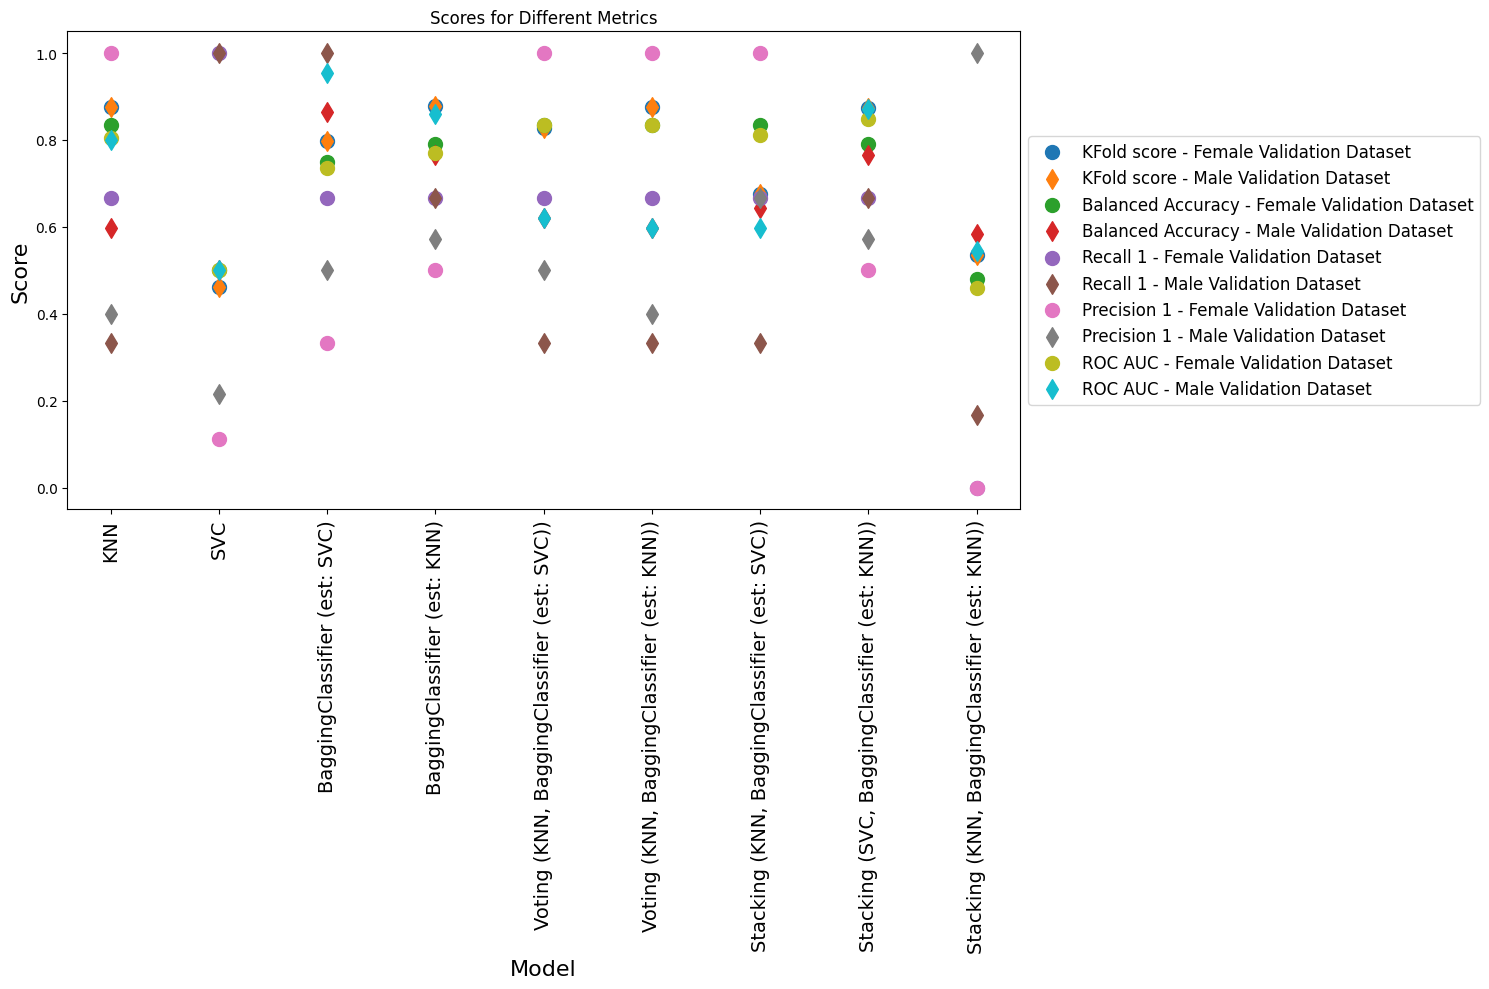

In [47]:
import matplotlib.pyplot as plt

# Define the scores obtained from each metric
scores = {
    'KFold score': SUM_KFOLD,
    'Balanced Accuracy': SUM_BALANCED_ACCURACY,
    # 'F1 score 0, 1': SUM_F1_0_1,
    'Recall 1': SUM_RECALL_1,
    'Precision 1': SUM_PRECISION_1,
    'ROC AUC': SUM_ROC_AUC
}

# Define point styles for the datasets
point_styles = ['o', 'd']  # Circle for female, square for male
point_sizes = [100, 100]  # Adjustable point sizes for each style

# Create a scatter plot for each metric
plt.figure(figsize=(15, 10))
for metric, data in scores.items():
    for i, dataset in enumerate(['Female Validation Dataset', 'Male Validation Dataset']):
        plt.scatter(range(len(data)), data[dataset], label=f'{metric} - {dataset}', marker=point_styles[i], s=point_sizes[i])

plt.xlabel('Model', fontsize=16)
plt.ylabel('Score', fontsize=16)
plt.title('Scores for Different Metrics')
plt.xticks(range(len(data)), data.index, rotation=90, fontsize=14)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
plt.tight_layout()
plt.show()


### Feature importance

#### Permutation feature importance

In [48]:
import numpy as np
from sklearn.inspection import permutation_importance

df = Imp_X_train
models = [knn, 
          # svc, bag, bag_knn, 
          voting, voting_, stacking, stacking_, stacking__]
X_val = [Imp_X_F_val, Imp_X_M_val]
y_val = [y_F_val, y_M_val]

# Collect the feature names
feature_names = df.columns

for model in models:
    print(f"Model: {type(model).__name__}")
    for i, (X, y) in enumerate(zip(X_val, y_val)):
        print(f"Dataset {i+1}:")
        # Calculate the permutation importance
        result = permutation_importance(model, X, y, n_repeats=10, random_state=42)
        # Sort features by their importance score
        sorted_indices = np.argsort(np.abs(result.importances_mean))[::-1]  # Sort in descending order of absolute importance
        # Print the sorted feature importance scores with actual names
        print("Sorted feature importance scores:")
        for idx in sorted_indices:
            print(f"    Feature '{feature_names[idx]}': {result.importances_mean[idx]}")
    print()


Model: KNeighborsClassifier
Dataset 1:
Sorted feature importance scores:
    Feature 'V24_mullen_cognitive_t_score_sum': 0.12592592592592589
    Feature 'V24_mullen_expressive_language_t': 0.09629629629629625
    Feature 'V24_mullen_gross_motor_t': 0.08148148148148146
    Feature 'V24_mullen_receptive_language_t': 0.08148148148148145
    Feature 'V24_mullen_composite_standard_score': 0.07777777777777775
    Feature 'V24_mullen_fine_motor_t': 0.07037037037037033
    Feature 'V24_mullen_visual_reception_t': 0.037037037037037
    Feature 'V24_Group': 0.0
    Feature 'Risk_dummy': 0.0
    Feature 'Gender_dummy': 0.0
Dataset 2:
Sorted feature importance scores:
    Feature 'V24_mullen_composite_standard_score': -0.09642857142857142
    Feature 'V24_mullen_cognitive_t_score_sum': 0.07499999999999998
    Feature 'V24_mullen_receptive_language_t': 0.06428571428571428
    Feature 'V24_mullen_expressive_language_t': -0.04999999999999999
    Feature 'V24_mullen_visual_reception_t': 0.035714285714